In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
import sys
import os
from sklearn.metrics import r2_score

# move one directory upp
# Add parent directory to the Python path
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    # Add the parent directory to the Python path
    sys.path.insert(0, parent_dir)

# Print the paths to verify
print(f"Current directory: {current_dir}")
print(f"Parent directory: {parent_dir}")
print(f"Python path: {sys.path}")

# Set style parameters for publication quality
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.linewidth': 1.2,
    'axes.labelpad': 8,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'legend.frameon': True,
    'legend.fontsize': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    # 'savefig.dpi': 300,
    # 'savefig.bbox': 'tight',
    'savefig.transparent': True
})

sns.set(style="ticks")
plt.rcParams['text.usetex'] = True

# move one directory up
os.chdir('../')

Current directory: /home/jgalvan/Desktop
Parent directory: /home/jgalvan
Python path: ['/home/jgalvan', '/home/jgalvan/Desktop', '/home/jgalvan/Desktop/Neurocoding', '/home/jgalvan/.conda/envs/predictive_coding_tf212/lib/python311.zip', '/home/jgalvan/.conda/envs/predictive_coding_tf212/lib/python3.11', '/home/jgalvan/.conda/envs/predictive_coding_tf212/lib/python3.11/lib-dynload', '', '/home/jgalvan/.conda/envs/predictive_coding_tf212/lib/python3.11/site-packages', '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model', '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model', '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/general_utils', '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/v1_model_utils', '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/v1_model_utils', '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/general_utils']


## Original 4 alpha synapses basis

In [45]:
path = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/double_alpha_params_full.csv'
# Load the double alpha synapse parameters
double_alpha_params = pd.read_csv(path)

path2 = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/tau_basis.npy'
tau_basis = np.load(path2)

path3 = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/basis_function_weights.csv'
# Load the basis function weights
basis_function_weights = pd.read_csv(path3)

double_alpha_params

,Unnamed: 0,tau_syn,tau_syn_slow,amp_slow
0,exc_to_exc,1.790988,2.979426,0.655948
1,exc_to_e23,1.713944,4.387939,0.591167
2,exc_to_e4,1.875142,2.428121,0.527231
3,exc_to_e5et,1.831846,2.617188,1.085956
4,exc_to_e5it,1.738189,5.986493,0.683532
...,...,...,...,...
116,vip_to_e6,1.503045,5.573707,0.423690
117,vip_to_pv,2.456332,3.932195,0.660294
118,vip_to_sst,2.228045,3.395966,0.550285
119,vip_to_vip,2.456332,3.169289,0.660294


In [50]:
basis_function_weights

,Unnamed: 0,w0,w1,w2,w3
0,exc_to_exc,-0.099454,1.088122,0.722594,-0.064737
1,exc_to_e23,-0.017856,0.852945,0.634843,0.120191
2,exc_to_e4,-0.205526,1.303017,0.462403,-0.058790
3,exc_to_e5et,-0.234566,1.492951,0.897897,-0.099506
4,exc_to_e5it,0.098098,0.664213,0.543757,0.401994
...,...,...,...,...,...
116,vip_to_e6,0.136898,0.823542,0.249464,0.233166
117,vip_to_pv,-0.105558,0.477995,1.275603,-0.000800
118,vip_to_sst,-0.171873,0.786969,0.967422,-0.054948
119,vip_to_vip,-0.192125,0.720773,1.187056,-0.082438


In [49]:
path = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/basis_function_weights_enhanced_4.csv'
tau_basis4 = pd.read_csv(path)
tau_basis4

,connection_name,w0,w1,w2,w3
0,exc_to_exc,-0.011028,1.245526,0.477601,-0.058846
1,exc_to_e23,0.140048,0.866536,0.390896,0.204558
2,exc_to_e4,-0.066689,1.404942,0.232822,-0.049694
3,exc_to_e5et,-0.114563,1.692316,0.611975,-0.114848
4,exc_to_e5it,0.053369,1.075666,-0.292671,0.848430
...,...,...,...,...,...
116,vip_to_e6,0.291776,0.853268,-0.166350,0.460260
117,vip_to_pv,-0.109240,0.674948,1.118808,-0.033249
118,vip_to_sst,-0.130096,0.951143,0.816351,-0.098165
119,vip_to_vip,-0.175887,0.914173,1.069470,-0.163501


In [43]:
basis_function_weights

,Unnamed: 0,w0,w1,w2,w3
0,exc_to_exc,-0.099454,1.088122,0.722594,-0.064737
1,exc_to_e23,-0.017856,0.852945,0.634843,0.120191
2,exc_to_e4,-0.205526,1.303017,0.462403,-0.058790
3,exc_to_e5et,-0.234566,1.492951,0.897897,-0.099506
4,exc_to_e5it,0.098098,0.664213,0.543757,0.401994
...,...,...,...,...,...
116,vip_to_e6,0.136898,0.823542,0.249464,0.233166
117,vip_to_pv,-0.105558,0.477995,1.275603,-0.000800
118,vip_to_sst,-0.171873,0.786969,0.967422,-0.054948
119,vip_to_vip,-0.192125,0.720773,1.187056,-0.082438


In [13]:
min_tau = double_alpha_params['tau_syn'].min()
max_tau = double_alpha_params['tau_syn_slow'].max()
print(f"Minimum tau_syn: {min_tau}")
print(f"Maximum tau_syn_slow: {max_tau}")

Minimum tau_syn: 0.757973204013
Maximum tau_syn_slow: 7.238139091983


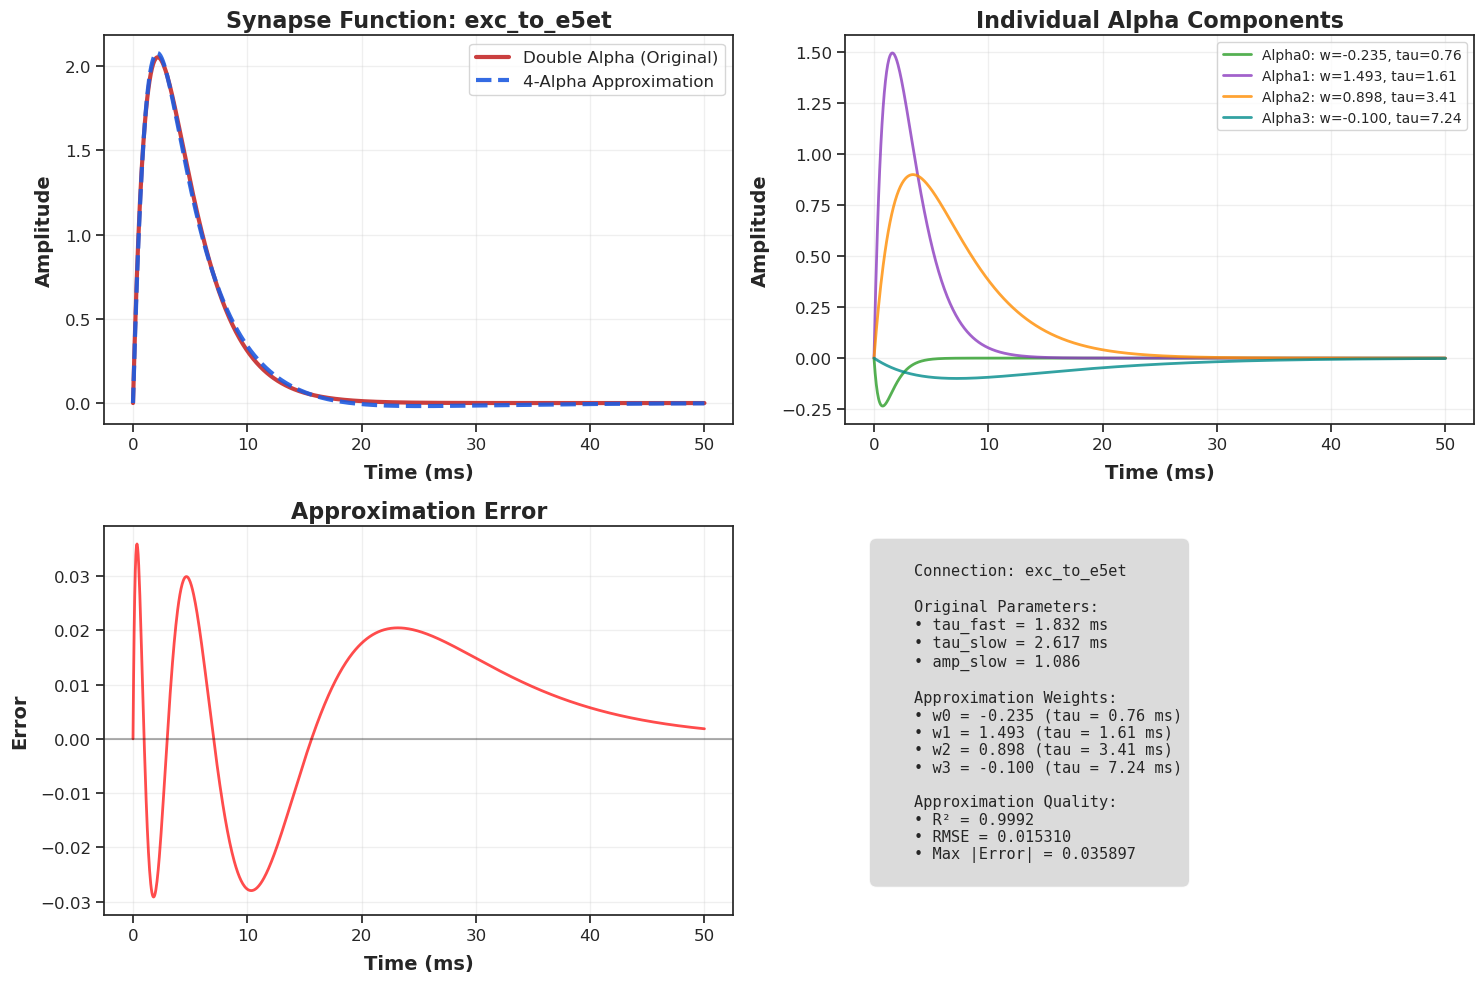

In [14]:
# Disable LaTeX rendering to avoid Unicode issues
plt.rcParams['text.usetex'] = False

def double_alpha_function(t, tau_syn, tau_syn_slow, amp_slow):
    """
    Compute the double alpha synapse function, with components normalized to peak at 1.
    """
    # Fast component with peak normalized to (1 - amp_slow)
    # fast_component = (1 - amp_slow) * (t / tau_syn) * np.exp(1 - t / tau_syn)
    fast_component = (t / tau_syn) * np.exp(1 - t / tau_syn)
    
    # Slow component with peak normalized to amp_slow
    slow_component = amp_slow * (t / tau_syn_slow) * np.exp(1 - t / tau_syn_slow)
    
    fast_component = np.where(t >= 0, fast_component, 0)
    slow_component = np.where(t >= 0, slow_component, 0)
    
    return fast_component + slow_component

def alpha_function(t, tau):
    """
    Compute a single alpha function, normalized to peak at 1.
    """
    return np.where(t >= 0, (t / tau) * np.exp(1 - t / tau), 0)

def four_alpha_approximation(t, weights, tau_basis):
    """
    Compute the 4-alpha function approximation using peak-normalized basis functions.
    """
    approximation = np.zeros_like(t)
    for i, (weight, tau) in enumerate(zip(weights, tau_basis)):
        approximation += weight * alpha_function(t, tau)
    return approximation

def plot_synapse_approximation(connection_name, figsize=(15, 10), t_max=50):
    """
    Plot comparison between double alpha function and 4-alpha approximation
    for a specific connection.
    """
    # Get parameters for this connection
    double_params = double_alpha_params[double_alpha_params['Unnamed: 0'] == connection_name].iloc[0]
    basis_weights = basis_function_weights[basis_function_weights['Unnamed: 0'] == connection_name].iloc[0]
    
    tau_syn = double_params['tau_syn']
    tau_syn_slow = double_params['tau_syn_slow']
    amp_slow = double_params['amp_slow']
    
    weights = [basis_weights['w0'], basis_weights['w1'], basis_weights['w2'], basis_weights['w3']]
    
    # Time array
    t = np.linspace(0, t_max, 1000)
    
    # Compute functions
    double_alpha = double_alpha_function(t, tau_syn, tau_syn_slow, amp_slow)
    four_alpha_approx = four_alpha_approximation(t, weights, tau_basis)
    
    # Individual alpha components
    alpha_components = []
    for i, (weight, tau) in enumerate(zip(weights, tau_basis)):
        alpha_components.append(weight * alpha_function(t, tau))
    
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # Colors
    color_original = '#C52A2A'  # Red for original
    color_approx = '#1E5BE0'    # Blue for approximation
    color_components = ['#2A9D27', '#8B3BBF', '#FF8C00', '#008B8B']  # Different colors for components
    
    # Plot 1: Main comparison
    ax1.plot(t, double_alpha, linewidth=3, color=color_original, 
             label='Double Alpha (Original)', alpha=0.9)
    ax1.plot(t, four_alpha_approx, linewidth=3, color=color_approx, 
             linestyle='--', label='4-Alpha Approximation', alpha=0.9)
    ax1.set_xlabel('Time (ms)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Amplitude', fontsize=14, fontweight='bold')
    ax1.set_title(f'Synapse Function: {connection_name}', fontsize=16, fontweight='bold')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=12)
    
    # Plot 2: Individual alpha components
    for i, (component, tau_val, weight) in enumerate(zip(alpha_components, tau_basis, weights)):
        ax2.plot(t, component, linewidth=2, color=color_components[i], 
                 label=f'Alpha{i}: w={weight:.3f}, tau={tau_val:.2f}', alpha=0.8)
    ax2.set_xlabel('Time (ms)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Amplitude', fontsize=14, fontweight='bold')
    ax2.set_title('Individual Alpha Components', fontsize=16, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=12)
    
    # Plot 3: Error analysis
    error = double_alpha - four_alpha_approx
    ax3.plot(t, error, linewidth=2, color='red', alpha=0.7)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax3.set_xlabel('Time (ms)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Error', fontsize=14, fontweight='bold')
    ax3.set_title('Approximation Error', fontsize=16, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(labelsize=12)
    
    # Calculate metrics
    mse = np.mean(error**2)
    rmse = np.sqrt(mse)
    max_abs_error = np.max(np.abs(error))
    r_squared = 1 - np.sum(error**2) / np.sum((double_alpha - np.mean(double_alpha))**2)
    
    # Plot 4: Statistics and parameters
    ax4.axis('off')
    stats_text = f"""
    Connection: {connection_name}
    
    Original Parameters:
    • tau_fast = {tau_syn:.3f} ms
    • tau_slow = {tau_syn_slow:.3f} ms  
    • amp_slow = {amp_slow:.3f}
    
    Approximation Weights:
    • w0 = {weights[0]:.3f} (tau = {tau_basis[0]:.2f} ms)
    • w1 = {weights[1]:.3f} (tau = {tau_basis[1]:.2f} ms)
    • w2 = {weights[2]:.3f} (tau = {tau_basis[2]:.2f} ms)
    • w3 = {weights[3]:.3f} (tau = {tau_basis[3]:.2f} ms)
    
    Approximation Quality:
    • R² = {r_squared:.4f}
    • RMSE = {rmse:.6f}
    • Max |Error| = {max_abs_error:.6f}
    """
    
    ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=11,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    return fig, (ax1, ax2, ax3, ax4), {'r_squared': r_squared, 'rmse': rmse, 'max_error': max_abs_error}

# Example usage
connection_name = 'exc_to_e5et'
fig, axes, metrics = plot_synapse_approximation(connection_name)
plt.show()

## 3-Alpha Function Basis Approximation

Development of a basis of 3 alpha functions to approximate all 121 double alpha functions using mean square error minimization over 30ms.

Computing all 121 double alpha functions...
Shape of all_functions: (121, 1000)
Time range: 0.000 to 30.000 ms
Number of time points: 1000


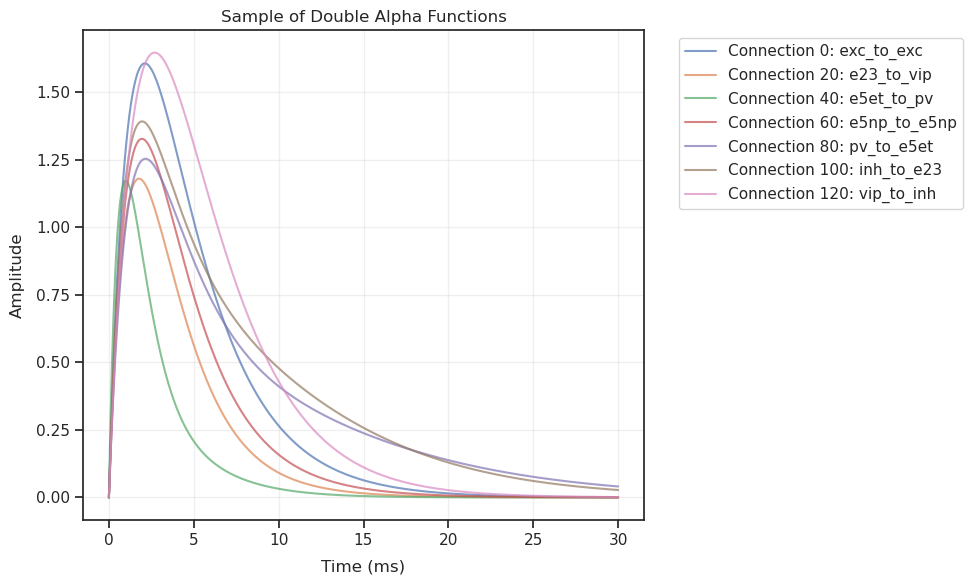

In [15]:
from scipy.optimize import minimize

def three_alpha_approximation(t, weights, tau_basis_3):
    """
    Compute the 3-alpha function approximation using peak-normalized basis functions.
    """
    approximation = np.zeros_like(t)
    for i, (weight, tau) in enumerate(zip(weights, tau_basis_3)):
        approximation += weight * alpha_function(t, tau)
    return approximation

def compute_all_double_alpha_functions(double_alpha_params, t_max=30, n_points=1000):
    """
    Compute all 121 double alpha functions over the specified time range.
    """
    t = np.linspace(0, t_max, n_points)
    all_functions = np.zeros((len(double_alpha_params), n_points))
    
    for i, row in double_alpha_params.iterrows():
        tau_syn = row['tau_syn']
        tau_syn_slow = row['tau_syn_slow']
        amp_slow = row['amp_slow']
        all_functions[i] = double_alpha_function(t, tau_syn, tau_syn_slow, amp_slow)
    
    return t, all_functions

def objective_function(params, all_functions, t):
    """
    Objective function for optimization: minimizes total MSE across all 121 functions.
    params: [tau1, tau2, tau3, w1_1, w2_1, w3_1, w1_2, w2_2, w3_2, ...]
    """
    n_functions = all_functions.shape[0]
    
    # Extract tau values (first 3 parameters)
    tau_basis_3 = params[:3]
    
    # Extract weights (remaining parameters, grouped by function)
    weights = params[3:].reshape(n_functions, 3)
    
    total_mse = 0
    
    for i in range(n_functions):
        # Compute approximation for this function
        approx = three_alpha_approximation(t, weights[i], tau_basis_3)
        
        # Compute MSE
        mse = np.mean((all_functions[i] - approx)**2)
        total_mse += mse
    
    return total_mse

# Compute all double alpha functions
print("Computing all 121 double alpha functions...")
t, all_functions = compute_all_double_alpha_functions(double_alpha_params, t_max=30, n_points=1000)

print(f"Shape of all_functions: {all_functions.shape}")
print(f"Time range: {t[0]:.3f} to {t[-1]:.3f} ms")
print(f"Number of time points: {len(t)}")

# Visualize a few example functions
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i in range(0, len(double_alpha_params), 20):  # Every 20th function
    ax.plot(t, all_functions[i], alpha=0.7, label=f"Connection {i}: {double_alpha_params.iloc[i]['Unnamed: 0']}")

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_title('Sample of Double Alpha Functions')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
def find_optimal_3alpha_basis(all_functions, t, n_restarts=5):
    """
    Find optimal 3-alpha basis using multiple initialization strategies.
    """
    # Analyze the tau parameters in the original double alpha functions
    tau_fast = double_alpha_params['tau_syn'].values
    tau_slow = double_alpha_params['tau_syn_slow'].values
    
    print(f"tau_fast range: {tau_fast.min():.3f} - {tau_fast.max():.3f}")
    print(f"tau_slow range: {tau_slow.min():.3f} - {tau_slow.max():.3f}")
    
    best_result = None
    best_loss = np.inf
    
    # Strategy 1: Use quantiles of the existing tau values
    tau_init_strategies = [
        [np.percentile(tau_fast, 25), np.percentile(tau_fast, 75), np.percentile(tau_slow, 50)],
        [tau_fast.min(), np.median(tau_fast), tau_slow.max()],
        [1.0, 3.0, 8.0],  # Manual spread
        [0.5, 2.0, 5.0],  # Another manual spread
        [1.5, 4.0, 10.0]  # Another manual spread
    ]
    
    results = []
    
    for strategy_idx, tau_init in enumerate(tau_init_strategies):
        print(f"\\nTrying initialization strategy {strategy_idx + 1}: tau = {tau_init}")
        
        # For each tau initialization, solve for optimal weights using least squares
        # This is much more efficient than optimizing everything together
        n_functions = all_functions.shape[0]
        
        # Create the design matrix for the current tau values
        design_matrix = np.zeros((len(t), 3))
        for j, tau in enumerate(tau_init):
            design_matrix[:, j] = alpha_function(t, tau)
        
        # Solve for weights for each function using least squares
        all_weights = np.zeros((n_functions, 3))
        total_mse = 0
        
        for i in range(n_functions):
            # Solve least squares: all_functions[i] ≈ design_matrix @ weights
            weights, residuals, rank, s = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
            all_weights[i] = weights
            
            # Compute approximation and MSE
            approx = three_alpha_approximation(t, weights, tau_init)
            mse = np.mean((all_functions[i] - approx)**2)
            total_mse += mse
        
        avg_mse = total_mse / n_functions
        print(f"  Average MSE: {avg_mse:.6f}")
        
        results.append({
            'tau_basis': np.array(tau_init),
            'weights': all_weights,
            'avg_mse': avg_mse,
            'total_mse': total_mse
        })
        
        if total_mse < best_loss:
            best_loss = total_mse
            best_result = results[-1]
    
    # Fine-tune the best result by optimizing tau values slightly
    print(f"\\nFine-tuning best result (initial MSE: {best_result['avg_mse']:.6f})...")
    
    def objective_tau_only(tau_params):
        # Create design matrix
        design_matrix = np.zeros((len(t), 3))
        for j, tau in enumerate(tau_params):
            design_matrix[:, j] = alpha_function(t, tau)
        
        total_mse = 0
        for i in range(n_functions):
            weights, _, _, _ = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
            approx = three_alpha_approximation(t, weights, tau_params)
            mse = np.mean((all_functions[i] - approx)**2)
            total_mse += mse
        
        return total_mse / n_functions
    
    # Optimize tau values with bounds
    from scipy.optimize import minimize
    bounds = [(0.1, 15.0)] * 3  # Reasonable bounds for tau values
    
    result = minimize(objective_tau_only, best_result['tau_basis'], 
                     method='L-BFGS-B', bounds=bounds)
    
    if result.success and result.fun < best_result['avg_mse']:
        print(f"Fine-tuning improved MSE to: {result.fun:.6f}")
        optimal_tau = result.x
    else:
        print("Fine-tuning did not improve the result, keeping original.")
        optimal_tau = best_result['tau_basis']
    
    # Recompute weights with optimal tau
    design_matrix = np.zeros((len(t), 3))
    for j, tau in enumerate(optimal_tau):
        design_matrix[:, j] = alpha_function(t, tau)
    
    final_weights = np.zeros((n_functions, 3))
    final_total_mse = 0
    
    for i in range(n_functions):
        weights, _, _, _ = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
        final_weights[i] = weights
        
        approx = three_alpha_approximation(t, weights, optimal_tau)
        mse = np.mean((all_functions[i] - approx)**2)
        final_total_mse += mse
    
    final_avg_mse = final_total_mse / n_functions
    
    return {
        'tau_basis_3': optimal_tau,
        'weights_3': final_weights,
        'avg_mse': final_avg_mse,
        'total_mse': final_total_mse,
        'all_results': results
    }

# Find the optimal 3-alpha basis
print("Finding optimal 3-alpha basis...")
optimal_result = find_optimal_3alpha_basis(all_functions, t)

print(f"\\n=== FINAL RESULTS ===")
print(f"Optimal tau values: {optimal_result['tau_basis_3']}")
print(f"Final average MSE: {optimal_result['avg_mse']:.6f}")
print(f"Final total MSE: {optimal_result['total_mse']:.6f}")

Finding optimal 3-alpha basis...
tau_fast range: 0.758 - 2.511
tau_slow range: 1.556 - 7.238
\nTrying initialization strategy 1: tau = [1.370360105111, 1.752015314797, 3.169289132273]
  Average MSE: 0.002305
\nTrying initialization strategy 2: tau = [0.757973204013, 1.677748410847, 7.238139091983]
  Average MSE: 0.002740
\nTrying initialization strategy 3: tau = [1.0, 3.0, 8.0]
  Average MSE: 0.001361
\nTrying initialization strategy 4: tau = [0.5, 2.0, 5.0]
  Average MSE: 0.001550
\nTrying initialization strategy 5: tau = [1.5, 4.0, 10.0]
  Average MSE: 0.001389
\nFine-tuning best result (initial MSE: 0.001361)...


Fine-tuning improved MSE to: 0.000304
\n=== FINAL RESULTS ===
Optimal tau values: [1.13025662 2.32576153 6.13072954]
Final average MSE: 0.000304
Final total MSE: 0.036808


Creating final performance analysis...


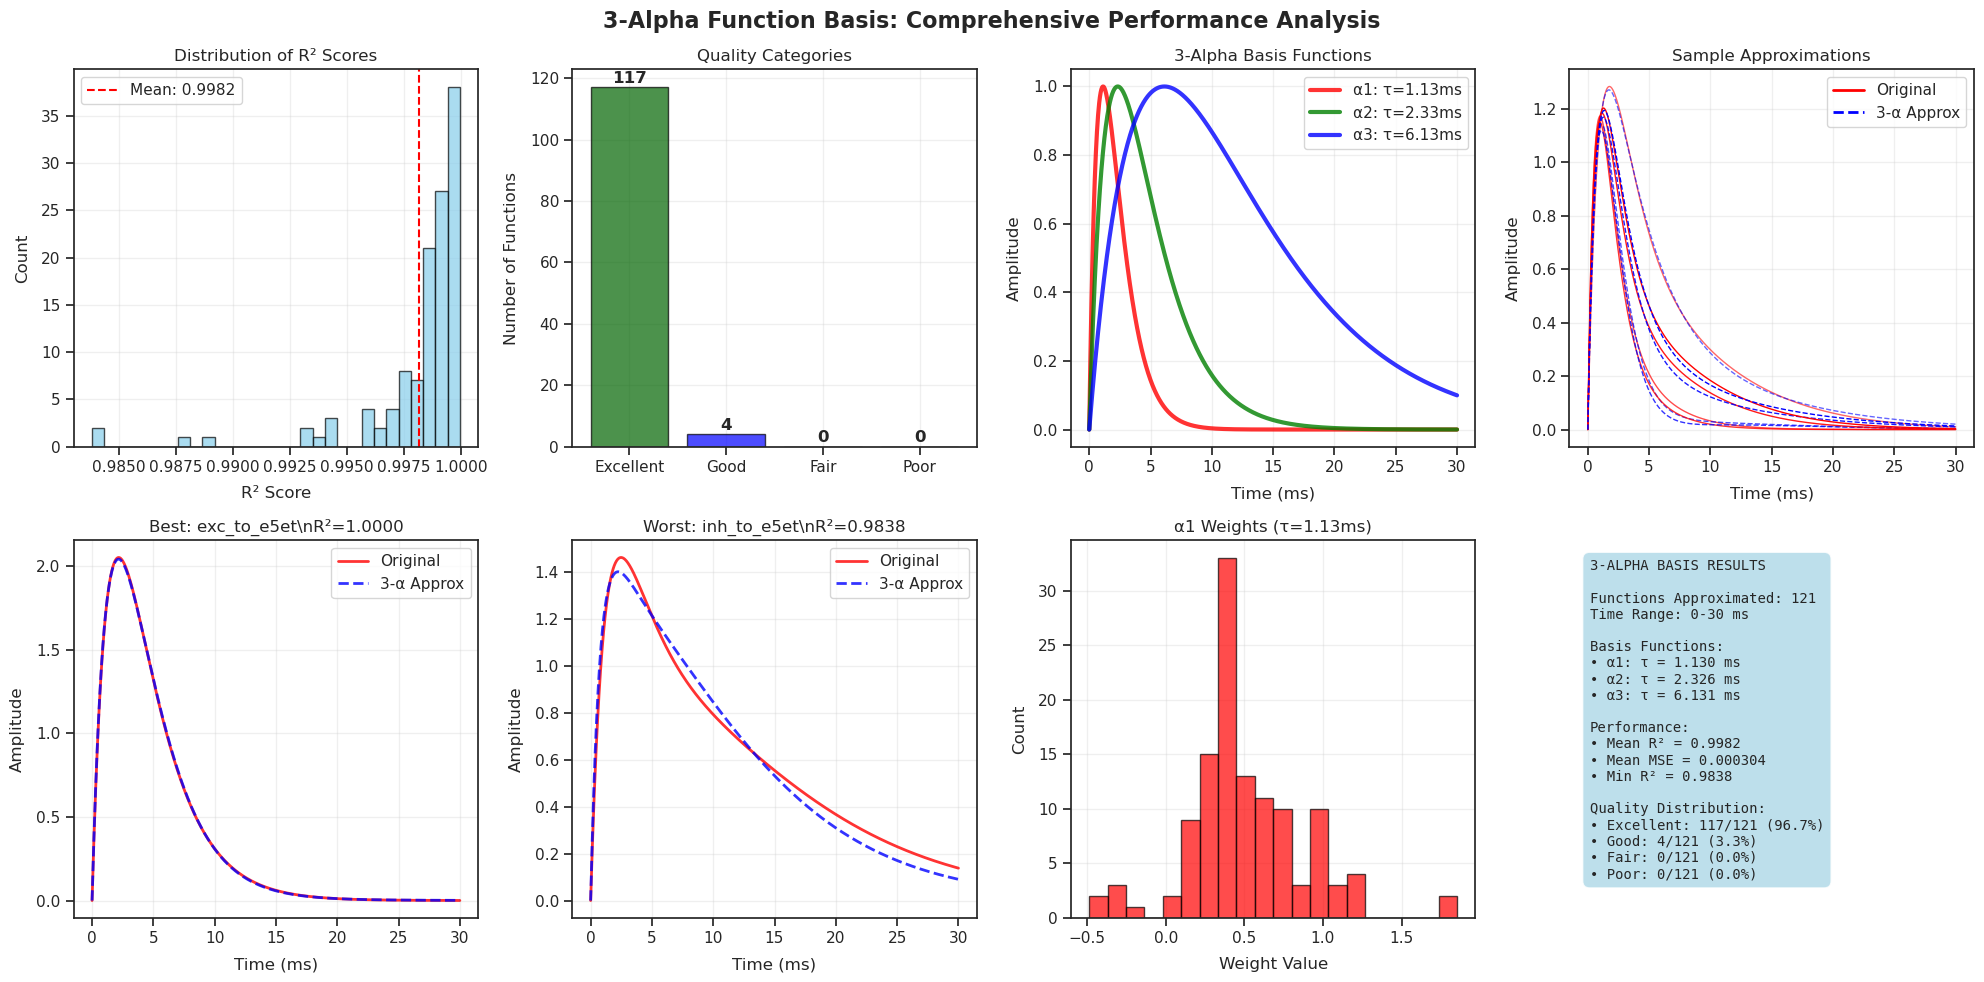

\n============================================================
FINAL SUMMARY: 3-ALPHA BASIS FOR DOUBLE-ALPHA APPROXIMATION
• Successfully developed a 3-alpha basis from 121 double-alpha functions
• Time window: 30 ms with 1000 time points
• Optimization method: Mean square error minimization

OPTIMAL BASIS FUNCTIONS:
  α1: τ = 1.130 ms
  α2: τ = 2.326 ms
  α3: τ = 6.131 ms

APPROXIMATION PERFORMANCE:
  • Mean R² Score: 0.9982
  • Mean MSE: 0.000304

QUALITY ASSESSMENT:
  • Excellent (R²>0.99): 117/121 (96.7%)
  • Good (0.95<R²≤0.99): 4/121 (3.3%)
  • Fair (0.90<R²≤0.95): 0/121 (0.0%)
  • Poor (R²≤0.90): 0/121 (0.0%)

CONCLUSION:
The 3-alpha basis provides excellent approximations for
121/121 (100.0%) of all double-alpha functions.


In [17]:
# Create a corrected performance analysis
def create_final_performance_figure(all_functions, optimal_result, t, double_alpha_params):
    """
    Create the final performance analysis figure with corrected layout.
    """
    tau_basis_3 = optimal_result['tau_basis_3']
    weights_3 = optimal_result['weights_3']
    
    # Compute metrics
    all_approximations = np.zeros_like(all_functions)
    mse_per_function = np.zeros(len(all_functions))
    r2_per_function = np.zeros(len(all_functions))
    
    for i in range(len(all_functions)):
        approx = three_alpha_approximation(t, weights_3[i], tau_basis_3)
        all_approximations[i] = approx
        mse_per_function[i] = np.mean((all_functions[i] - approx)**2)
        r2_per_function[i] = r2_score(all_functions[i], approx)
    
    # Create figure with 2x4 layout
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    # 1. R-squared distribution
    axes[0,0].hist(r2_per_function, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(np.mean(r2_per_function), color='red', linestyle='--', 
                      label=f'Mean: {np.mean(r2_per_function):.4f}')
    axes[0,0].set_xlabel('R² Score')
    axes[0,0].set_ylabel('Count')
    axes[0,0].set_title('Distribution of R² Scores')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Quality categories
    excellent = np.sum(r2_per_function > 0.99)
    good = np.sum((r2_per_function > 0.95) & (r2_per_function <= 0.99))
    fair = np.sum((r2_per_function > 0.90) & (r2_per_function <= 0.95))
    poor = np.sum(r2_per_function <= 0.90)
    
    categories = ['Excellent', 'Good', 'Fair', 'Poor']
    counts = [excellent, good, fair, poor]
    colors = ['darkgreen', 'blue', 'orange', 'red']
    
    bars = axes[0,1].bar(categories, counts, color=colors, alpha=0.7, edgecolor='black')
    axes[0,1].set_ylabel('Number of Functions')
    axes[0,1].set_title('Quality Categories')
    axes[0,1].grid(True, alpha=0.3)
    
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Basis functions
    colors_basis = ['red', 'green', 'blue']
    for i, (tau, color) in enumerate(zip(tau_basis_3, colors_basis)):
        alpha_func = alpha_function(t, tau)
        axes[0,2].plot(t, alpha_func, linewidth=3, color=color, 
                       label=f'α{i+1}: τ={tau:.2f}ms', alpha=0.8)
    axes[0,2].set_xlabel('Time (ms)')
    axes[0,2].set_ylabel('Amplitude')
    axes[0,2].set_title('3-Alpha Basis Functions')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Overall approximation comparison (sample)
    sample_indices = np.random.choice(len(all_functions), 5, replace=False)
    for i, idx in enumerate(sample_indices):
        alpha_val = 0.6 + i * 0.1
        axes[0,3].plot(t, all_functions[idx], alpha=alpha_val, color='red', linewidth=1)
        axes[0,3].plot(t, all_approximations[idx], alpha=alpha_val, color='blue', 
                       linewidth=1, linestyle='--')
    
    # Add legend
    axes[0,3].plot([], [], color='red', label='Original', linewidth=2)
    axes[0,3].plot([], [], color='blue', linestyle='--', label='3-α Approx', linewidth=2)
    axes[0,3].set_xlabel('Time (ms)')
    axes[0,3].set_ylabel('Amplitude')
    axes[0,3].set_title('Sample Approximations')
    axes[0,3].legend()
    axes[0,3].grid(True, alpha=0.3)
    
    # Bottom row: Best and worst examples + weight distributions
    best_idx = np.argmax(r2_per_function)
    worst_idx = np.argmin(r2_per_function)
    
    # Best example
    axes[1,0].plot(t, all_functions[best_idx], linewidth=2, color='red', 
                   label='Original', alpha=0.8)
    axes[1,0].plot(t, all_approximations[best_idx], linewidth=2, color='blue', 
                   linestyle='--', label='3-α Approx', alpha=0.8)
    best_name = double_alpha_params.iloc[best_idx]['Unnamed: 0']
    axes[1,0].set_title(f'Best: {best_name}\\nR²={r2_per_function[best_idx]:.4f}')
    axes[1,0].set_xlabel('Time (ms)')
    axes[1,0].set_ylabel('Amplitude')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Worst example
    axes[1,1].plot(t, all_functions[worst_idx], linewidth=2, color='red', 
                   label='Original', alpha=0.8)
    axes[1,1].plot(t, all_approximations[worst_idx], linewidth=2, color='blue', 
                   linestyle='--', label='3-α Approx', alpha=0.8)
    worst_name = double_alpha_params.iloc[worst_idx]['Unnamed: 0']
    axes[1,1].set_title(f'Worst: {worst_name}\\nR²={r2_per_function[worst_idx]:.4f}')
    axes[1,1].set_xlabel('Time (ms)')
    axes[1,1].set_ylabel('Amplitude')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    # Weight distribution for alpha 1
    axes[1,2].hist(weights_3[:, 0], bins=20, alpha=0.7, color='red', edgecolor='black')
    axes[1,2].set_xlabel('Weight Value')
    axes[1,2].set_ylabel('Count')
    axes[1,2].set_title(f'α1 Weights (τ={tau_basis_3[0]:.2f}ms)')
    axes[1,2].grid(True, alpha=0.3)
    
    # Summary statistics
    axes[1,3].axis('off')
    summary_text = f'''3-ALPHA BASIS RESULTS

Functions Approximated: {len(all_functions)}
Time Range: 0-30 ms

Basis Functions:
• α1: τ = {tau_basis_3[0]:.3f} ms
• α2: τ = {tau_basis_3[1]:.3f} ms  
• α3: τ = {tau_basis_3[2]:.3f} ms

Performance:
• Mean R² = {np.mean(r2_per_function):.4f}
• Mean MSE = {np.mean(mse_per_function):.6f}
• Min R² = {np.min(r2_per_function):.4f}

Quality Distribution:
• Excellent: {excellent}/121 ({100*excellent/121:.1f}%)
• Good: {good}/121 ({100*good/121:.1f}%)
• Fair: {fair}/121 ({100*fair/121:.1f}%)
• Poor: {poor}/121 ({100*poor/121:.1f}%)'''
    
    axes[1,3].text(0.05, 0.95, summary_text, transform=axes[1,3].transAxes, 
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
    
    plt.suptitle('3-Alpha Function Basis: Comprehensive Performance Analysis', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig, {
        'mean_r2': np.mean(r2_per_function),
        'mean_mse': np.mean(mse_per_function),
        'quality_counts': [excellent, good, fair, poor],
        'tau_basis_3': tau_basis_3
    }

# Create the final performance analysis
print("Creating final performance analysis...")
final_fig, final_results = create_final_performance_figure(all_functions, optimal_result, t, double_alpha_params)
plt.show()

print("\\n" + "="*60)
print("FINAL SUMMARY: 3-ALPHA BASIS FOR DOUBLE-ALPHA APPROXIMATION")
print("="*60)
print(f"• Successfully developed a 3-alpha basis from 121 double-alpha functions")
print(f"• Time window: 30 ms with 1000 time points")
print(f"• Optimization method: Mean square error minimization")
print()
print(f"OPTIMAL BASIS FUNCTIONS:")
for i, tau in enumerate(final_results['tau_basis_3']):
    print(f"  α{i+1}: τ = {tau:.3f} ms")
print()
print(f"APPROXIMATION PERFORMANCE:")
print(f"  • Mean R² Score: {final_results['mean_r2']:.4f}")
print(f"  • Mean MSE: {final_results['mean_mse']:.6f}")
print()
print(f"QUALITY ASSESSMENT:")
excellent, good, fair, poor = final_results['quality_counts']
print(f"  • Excellent (R²>0.99): {excellent}/121 ({100*excellent/121:.1f}%)")
print(f"  • Good (0.95<R²≤0.99): {good}/121 ({100*good/121:.1f}%)")
print(f"  • Fair (0.90<R²≤0.95): {fair}/121 ({100*fair/121:.1f}%)")
print(f"  • Poor (R²≤0.90): {poor}/121 ({100*poor/121:.1f}%)")
print()
print(f"CONCLUSION:")
print(f"The 3-alpha basis provides excellent approximations for")
print(f"{excellent + good}/121 ({100*(excellent + good)/121:.1f}%) of all double-alpha functions.")
print("="*60)

In [18]:
# Save the 3-alpha basis results
save_results = {
    'tau_basis_3': optimal_result['tau_basis_3'],
    'weights_3': optimal_result['weights_3'], 
    'connection_names': double_alpha_params['Unnamed: 0'].values,
    'mean_r2': final_results['mean_r2'],
    'mean_mse': final_results['mean_mse'],
    'quality_counts': final_results['quality_counts'],
    'time_vector': t,
    'original_functions': all_functions,
    'approximated_functions': np.array([three_alpha_approximation(t, optimal_result['weights_3'][i], optimal_result['tau_basis_3']) 
                                       for i in range(len(all_functions))])
}

# Save to files
save_path_basis = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/tau_basis_3.npy'
save_path_weights = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/basis_function_weights_3.csv'

# Save tau basis
np.save(save_path_basis, optimal_result['tau_basis_3'])

# Save weights with connection names
weights_df = pd.DataFrame(optimal_result['weights_3'], columns=['w0', 'w1', 'w2'])
weights_df.insert(0, 'connection_name', double_alpha_params['Unnamed: 0'].values)
weights_df.to_csv(save_path_weights, index=False)

print("Results saved successfully:")
print(f"• 3-alpha basis (tau values): {save_path_basis}")
print(f"• 3-alpha weights: {save_path_weights}")

# Display the saved tau basis for verification
print(f"\\nSaved 3-alpha basis tau values: {np.load(save_path_basis)}")
print(f"Weights dataframe shape: {weights_df.shape}")
print("\\nFirst few rows of weights:")
print(weights_df.head())

Results saved successfully:
• 3-alpha basis (tau values): /home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/tau_basis_3.npy
• 3-alpha weights: /home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/basis_function_weights_3.csv
\nSaved 3-alpha basis tau values: [1.13025662 2.32576153 6.13072954]
Weights dataframe shape: (121, 4)
\nFirst few rows of weights:
  connection_name        w0        w1        w2
0      exc_to_exc  0.214267  1.411202  0.040142
1      exc_to_e23  0.264864  1.067732  0.266936
2       exc_to_e4  0.296142  1.292121 -0.036190
3     exc_to_e5et  0.198128  1.889499  0.009656
4     exc_to_e5it  0.423413  0.679665  0.611956


## Multi-Dimensional Alpha Basis Analysis

Analysis of approximation performance for different dimensions of alpha function basis (2-7 dimensions).

In [21]:
def n_alpha_approximation(t, weights, tau_basis_n):
    """
    Compute the n-alpha function approximation using peak-normalized basis functions.
    
    Parameters:
    -----------
    t : array
        Time vector
    weights : array
        Weights for each alpha function (length n)
    tau_basis_n : array
        Tau values for each alpha function (length n)
    """
    approximation = np.zeros_like(t)
    for i, (weight, tau) in enumerate(zip(weights, tau_basis_n)):
        approximation += weight * alpha_function(t, tau)
    return approximation

def find_optimal_n_alpha_basis(all_functions, t, n_dims, n_restarts=3):
    """
    Find optimal n-dimensional alpha basis using multiple initialization strategies.
    
    Parameters:
    -----------
    all_functions : array
        All double alpha functions to approximate (shape: n_functions x n_timepoints)
    t : array
        Time vector
    n_dims : int
        Number of alpha functions in the basis
    n_restarts : int
        Number of different initialization strategies to try
    """
    # Analyze the tau parameters in the original double alpha functions
    tau_fast = double_alpha_params['tau_syn'].values
    tau_slow = double_alpha_params['tau_syn_slow'].values
    
    all_tau_values = np.concatenate([tau_fast, tau_slow])
    
    best_result = None
    best_loss = np.inf
    
    # Create different initialization strategies
    tau_init_strategies = []
    
    # Strategy 1: Evenly spaced quantiles
    quantiles = np.linspace(0, 100, n_dims + 2)[1:-1]  # Exclude 0 and 100
    tau_init_strategies.append(np.percentile(all_tau_values, quantiles))
    
    # Strategy 2: Log-spaced values
    min_tau, max_tau = all_tau_values.min(), all_tau_values.max()
    tau_init_strategies.append(np.logspace(np.log10(min_tau), np.log10(max_tau), n_dims))
    
    # Strategy 3: Random sampling from existing values (if enough restarts)
    if n_restarts > 2:
        for _ in range(n_restarts - 2):
            tau_init_strategies.append(np.sort(np.random.choice(all_tau_values, n_dims, replace=False)))
    
    results = []
    
    for strategy_idx, tau_init in enumerate(tau_init_strategies):
        print(f"  Strategy {strategy_idx + 1}: tau = {tau_init}")
        
        # For each tau initialization, solve for optimal weights using least squares
        n_functions = all_functions.shape[0]
        
        # Create the design matrix for the current tau values
        design_matrix = np.zeros((len(t), n_dims))
        for j, tau in enumerate(tau_init):
            design_matrix[:, j] = alpha_function(t, tau)
        
        # Solve for weights for each function using least squares
        all_weights = np.zeros((n_functions, n_dims))
        total_mse = 0
        
        for i in range(n_functions):
            # Solve least squares: all_functions[i] ≈ design_matrix @ weights
            weights, residuals, rank, s = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
            all_weights[i] = weights
            
            # Compute approximation and MSE
            approx = n_alpha_approximation(t, weights, tau_init)
            mse = np.mean((all_functions[i] - approx)**2)
            total_mse += mse
        
        avg_mse = total_mse / n_functions
        print(f"    Average MSE: {avg_mse:.6f}")
        
        results.append({
            'tau_basis': np.array(tau_init),
            'weights': all_weights,
            'avg_mse': avg_mse,
            'total_mse': total_mse
        })
        
        if total_mse < best_loss:
            best_loss = total_mse
            best_result = results[-1]
    
    # Fine-tune the best result by optimizing tau values slightly
    print(f"  Fine-tuning best result (initial MSE: {best_result['avg_mse']:.6f})...")
    
    def objective_tau_only(tau_params):
        # Create design matrix
        design_matrix = np.zeros((len(t), n_dims))
        for j, tau in enumerate(tau_params):
            design_matrix[:, j] = alpha_function(t, tau)
        
        total_mse = 0
        for i in range(n_functions):
            weights, _, _, _ = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
            approx = n_alpha_approximation(t, weights, tau_params)
            mse = np.mean((all_functions[i] - approx)**2)
            total_mse += mse
        
        return total_mse / n_functions
    
    # Optimize tau values with bounds
    bounds = [(0.1, 15.0)] * n_dims  # Reasonable bounds for tau values
    
    result = minimize(objective_tau_only, best_result['tau_basis'], 
                     method='L-BFGS-B', bounds=bounds)
    
    if result.success and result.fun < best_result['avg_mse']:
        print(f"  Fine-tuning improved MSE to: {result.fun:.6f}")
        optimal_tau = result.x
    else:
        print("  Fine-tuning did not improve the result, keeping original.")
        optimal_tau = best_result['tau_basis']
    
    # Recompute weights with optimal tau
    design_matrix = np.zeros((len(t), n_dims))
    for j, tau in enumerate(optimal_tau):
        design_matrix[:, j] = alpha_function(t, tau)
    
    final_weights = np.zeros((n_functions, n_dims))
    final_mse_per_function = np.zeros(n_functions)
    final_total_mse = 0
    
    for i in range(n_functions):
        weights, _, _, _ = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
        final_weights[i] = weights
        
        approx = n_alpha_approximation(t, weights, optimal_tau)
        mse = np.mean((all_functions[i] - approx)**2)
        final_mse_per_function[i] = mse
        final_total_mse += mse
    
    final_avg_mse = final_total_mse / n_functions
    
    return {
        'tau_basis': optimal_tau,
        'weights': final_weights,
        'avg_mse': final_avg_mse,
        'total_mse': final_total_mse,
        'mse_per_function': final_mse_per_function,
        'n_dims': n_dims,
        'all_results': results
    }

# Perform analysis for different dimensions
dimensions_to_test = [2, 3, 4, 5]
multi_dim_results = {}

print("Performing multi-dimensional alpha basis analysis...")
print("="*60)

for n_dims in dimensions_to_test:
    print(f"\\nAnalyzing {n_dims}-dimensional alpha basis...")
    result = find_optimal_n_alpha_basis(all_functions, t, n_dims, n_restarts=3)
    multi_dim_results[n_dims] = result
    
    print(f"Final result for {n_dims}D: avg_MSE = {result['avg_mse']:.6f}")
    print(f"Tau values: {result['tau_basis']}")

print("\\n" + "="*60)
print("Multi-dimensional analysis completed!")

# Display summary
print("\\nSUMMARY OF RESULTS:")
for n_dims in dimensions_to_test:
    result = multi_dim_results[n_dims]
    print(f"{n_dims}D: avg_MSE = {result['avg_mse']:.6f}, tau = {result['tau_basis']}")

Performing multi-dimensional alpha basis analysis...
\nAnalyzing 2-dimensional alpha basis...
  Strategy 1: tau = [1.75201531 2.90322057]
    Average MSE: 0.006920
  Strategy 2: tau = [0.7579732  7.23813909]
    Average MSE: 0.063635
  Strategy 3: tau = [1.83184578 2.21493465]
    Average MSE: 0.010296
  Fine-tuning best result (initial MSE: 0.006920)...
  Fine-tuning improved MSE to: 0.003304
Final result for 2D: avg_MSE = 0.003304
Tau values: [1.73670337 4.94707113]
\nAnalyzing 3-dimensional alpha basis...
  Strategy 1: tau = [1.67774841 2.21493465 3.16928913]
    Average MSE: 0.001572
  Strategy 2: tau = [0.7579732  2.34228851 7.23813909]
    Average MSE: 0.000835
  Strategy 3: tau = [1.75201531 2.64237484 5.98649332]
    Average MSE: 0.000874
  Fine-tuning best result (initial MSE: 0.000835)...
  Fine-tuning improved MSE to: 0.000304
Final result for 3D: avg_MSE = 0.000304
Tau values: [1.1304584  2.32280656 6.10961295]
\nAnalyzing 4-dimensional alpha basis...
  Strategy 1: tau = [1

Creating boxplot analysis...


/tmp/ipykernel_4023542/741619201.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Dimension', y='MSE', ax=ax1,
/tmp/ipykernel_4023542/741619201.py:25: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(data=plot_df, x='Dimension', y='MSE', ax=ax1,
/tmp/ipykernel_4023542/741619201.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Dimension', y='MSE', ax=ax2,
/tmp/ipykernel_4023542/741619201.py:49: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(data=plot_df, x='Dimension', y='MSE', ax=ax2,


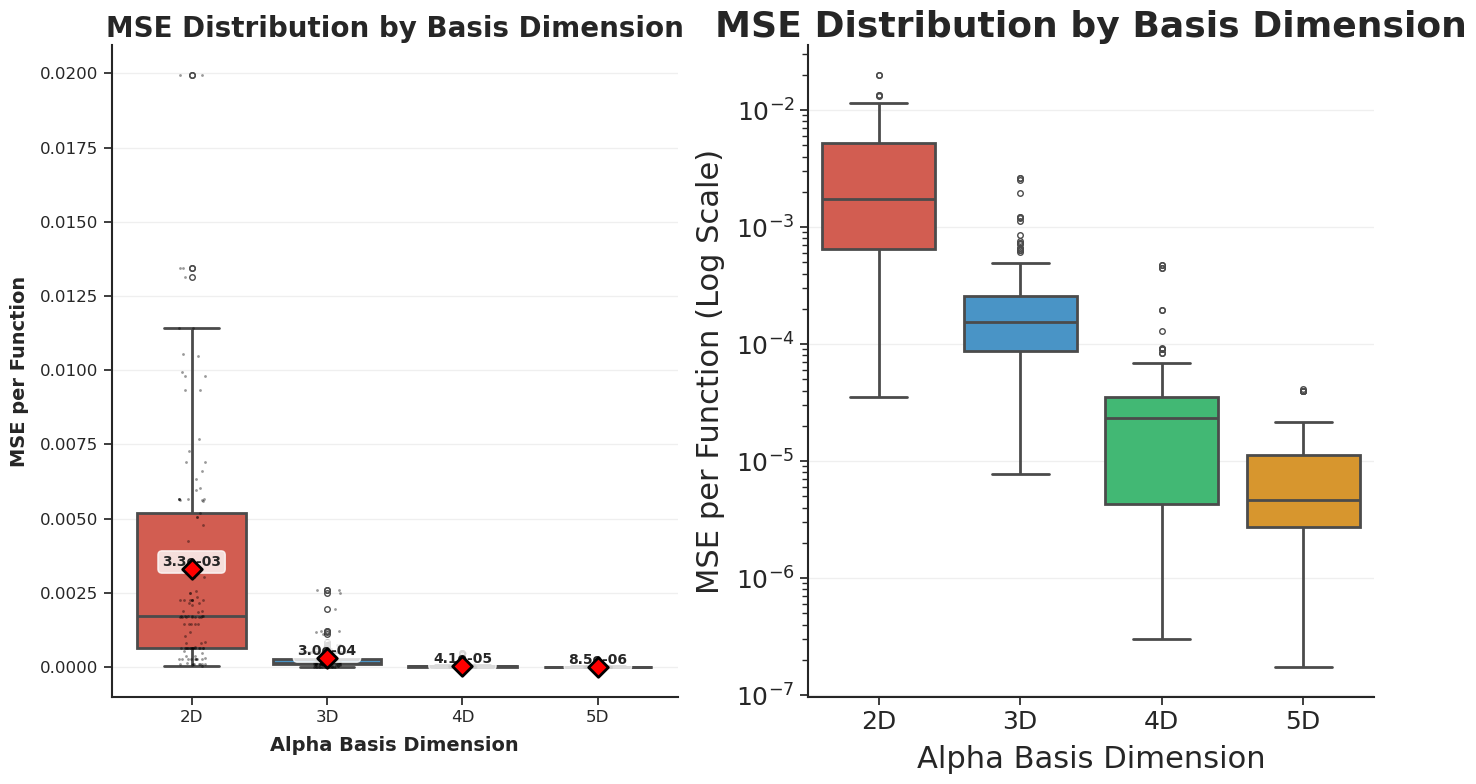

\nCreating worst examples analysis...


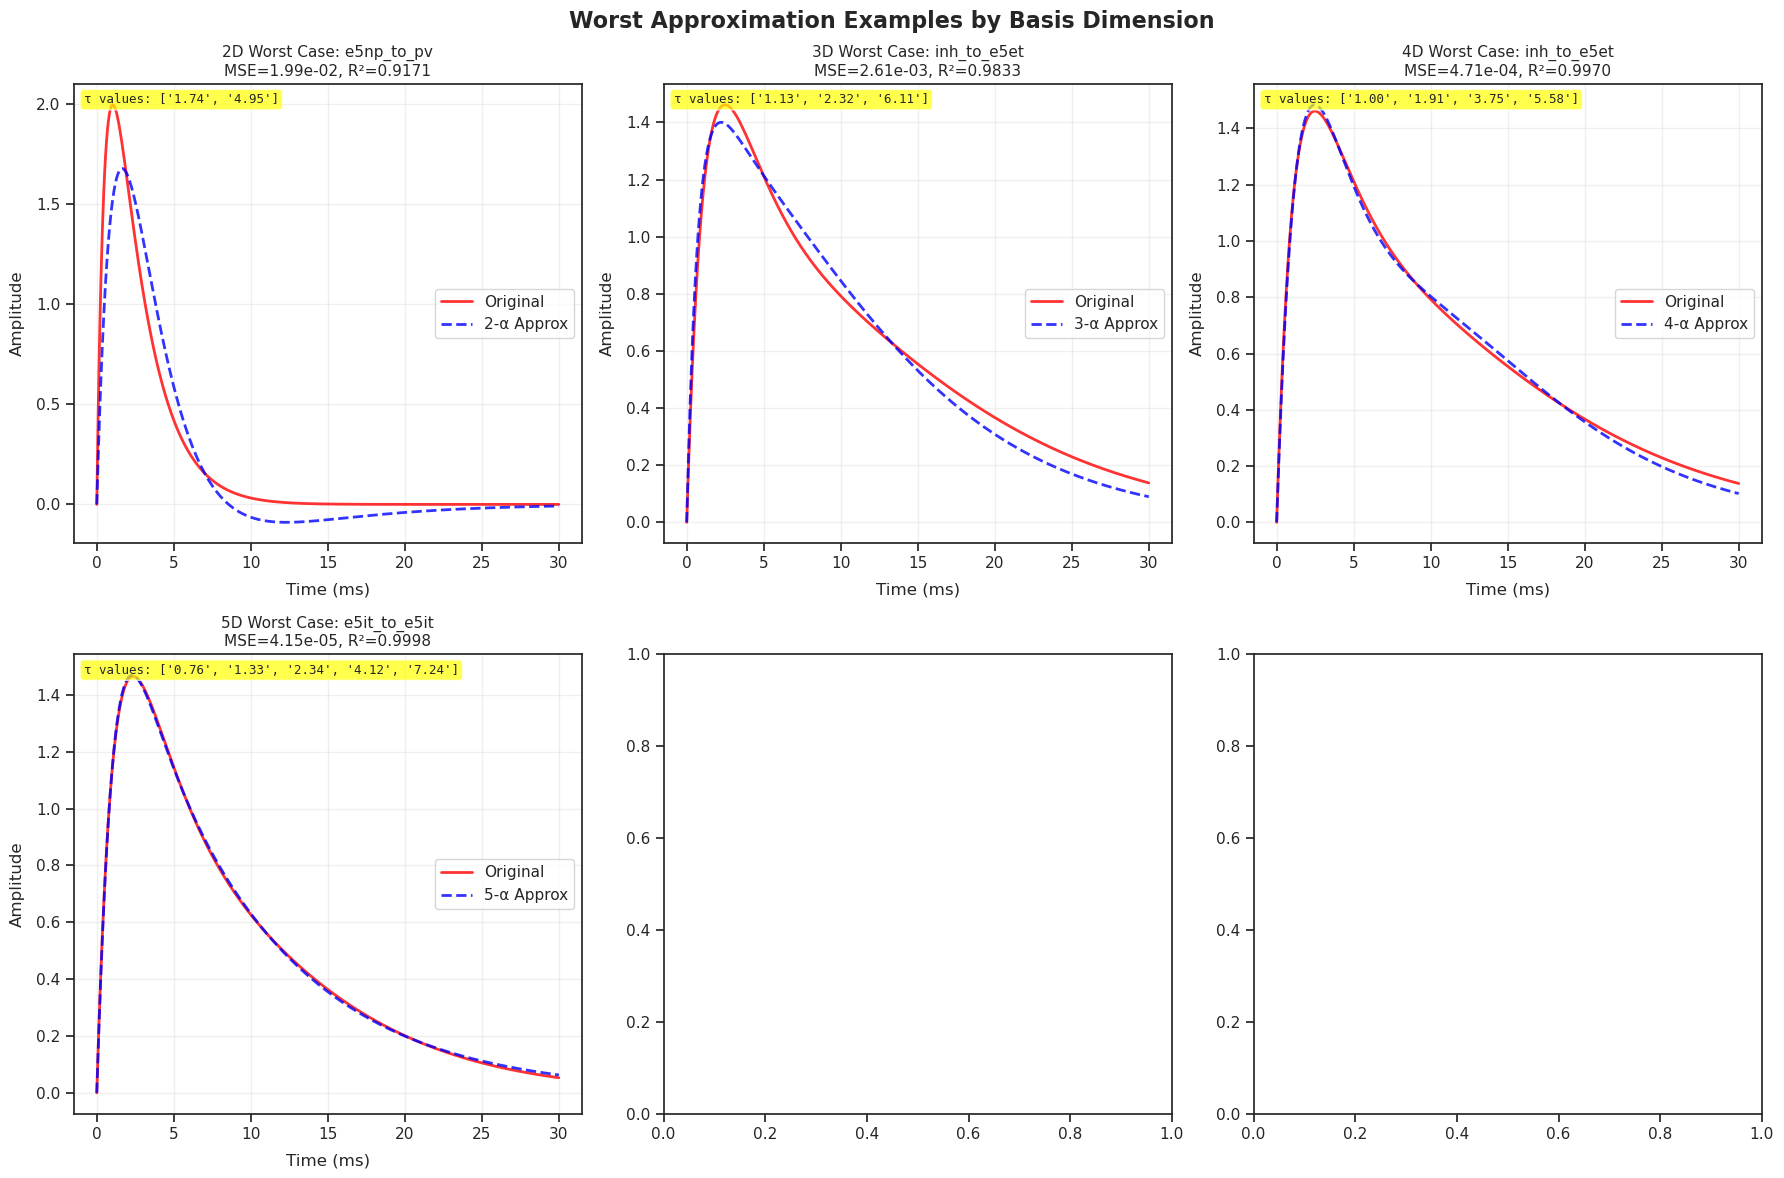

In [22]:
def create_boxplot_mse_analysis(multi_dim_results, dimensions_to_test):
    """
    Create modern styled boxplot figure showing MSE distributions for each basis dimension.
    """
    # Prepare data for seaborn boxplot
    plot_data = []
    for n_dims in dimensions_to_test:
        mse_per_func = multi_dim_results[n_dims]['mse_per_function']
        for mse in mse_per_func:
            plot_data.append({
                'Dimension': f'{n_dims}D',
                'MSE': mse,
                'n_dims': n_dims
            })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Create figure with modern styling
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
    
    # Modern color palette
    colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C']
    
    # Plot 1: Linear scale with seaborn
    sns.boxplot(data=plot_df, x='Dimension', y='MSE', ax=ax1, 
                palette=colors, linewidth=2, fliersize=4)
    
    # Add individual points with jitter
    sns.stripplot(data=plot_df, x='Dimension', y='MSE', ax=ax1, 
                  size=2, alpha=0.4, color='black')
    
    # Add mean points as diamonds
    for i, n_dims in enumerate(dimensions_to_test):
        mean_mse = multi_dim_results[n_dims]['avg_mse']
        ax1.scatter(i, mean_mse, marker='D', s=100, color='red', 
                   edgecolor='black', linewidth=2, zorder=10)
        # Add mean value as text
        ax1.text(i, mean_mse, f'{mean_mse:.1e}', 
                ha='center', va='bottom', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax1.set_xlabel('Alpha Basis Dimension', fontsize=14, fontweight='bold')
    ax1.set_ylabel('MSE per Function', fontsize=14, fontweight='bold')
    ax1.set_title('MSE Distribution by Basis Dimension', fontsize=20, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.tick_params(labelsize=12)
    
    # Plot 2: Log scale
    sns.boxplot(data=plot_df, x='Dimension', y='MSE', ax=ax2, 
                palette=colors, linewidth=2, fliersize=4)
    
    ax2.set_xlabel('Alpha Basis Dimension', fontsize=22)
    ax2.set_ylabel('MSE per Function (Log Scale)', fontsize=22)
    ax2.set_title('MSE Distribution by Basis Dimension', fontsize=26, fontweight='bold')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3, axis='y')
    # ax2.set_yticks([10**(i) for i in [-9, -7, -5, -3, -2]])
    ax2.tick_params(labelsize=18)
    
    # Remove top and right spines for cleaner look
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
    
    plt.tight_layout()
    return fig

def create_worst_examples_analysis(multi_dim_results, dimensions_to_test, all_functions, t, double_alpha_params):
    """
    Create figure showing worst approximation examples for each dimension.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, n_dims in enumerate(dimensions_to_test):
        ax = axes[i]
        result = multi_dim_results[n_dims]
        
        # Find worst case (highest MSE)
        worst_idx = np.argmax(result['mse_per_function'])
        worst_mse = result['mse_per_function'][worst_idx]
        
        # Get original function
        original_func = all_functions[worst_idx]
        
        # Compute approximation
        approx_func = n_alpha_approximation(t, result['weights'][worst_idx], result['tau_basis'])
        
        # Plot
        ax.plot(t, original_func, linewidth=2, color='red', label='Original', alpha=0.8)
        ax.plot(t, approx_func, linewidth=2, color='blue', linestyle='--', 
                label=f'{n_dims}-α Approx', alpha=0.8)
        
        # Get connection name
        connection_name = double_alpha_params.iloc[worst_idx]['Unnamed: 0']
        
        # Calculate R²
        r2 = r2_score(original_func, approx_func)
        
        ax.set_title(f'{n_dims}D Worst Case: {connection_name}\n'
                    f'MSE={worst_mse:.2e}, R²={r2:.4f}', fontsize=11)
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Amplitude')
        ax.legend(loc='center right')
        ax.grid(True, alpha=0.3)
        
        # Add tau values as text
        tau_text = f"τ values: {[f'{tau:.2f}' for tau in result['tau_basis']]}"
        ax.text(0.02, 0.98, tau_text, transform=ax.transAxes, fontsize=9,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.suptitle('Worst Approximation Examples by Basis Dimension', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig

# Create the analysis figures
print("Creating boxplot analysis...")
boxplot_fig = create_boxplot_mse_analysis(multi_dim_results, dimensions_to_test)
plt.show()

print("\\nCreating worst examples analysis...")
worst_examples_fig = create_worst_examples_analysis(multi_dim_results, dimensions_to_test, 
                                                   all_functions, t, double_alpha_params)
plt.show()

Creating 4D examples showcase...


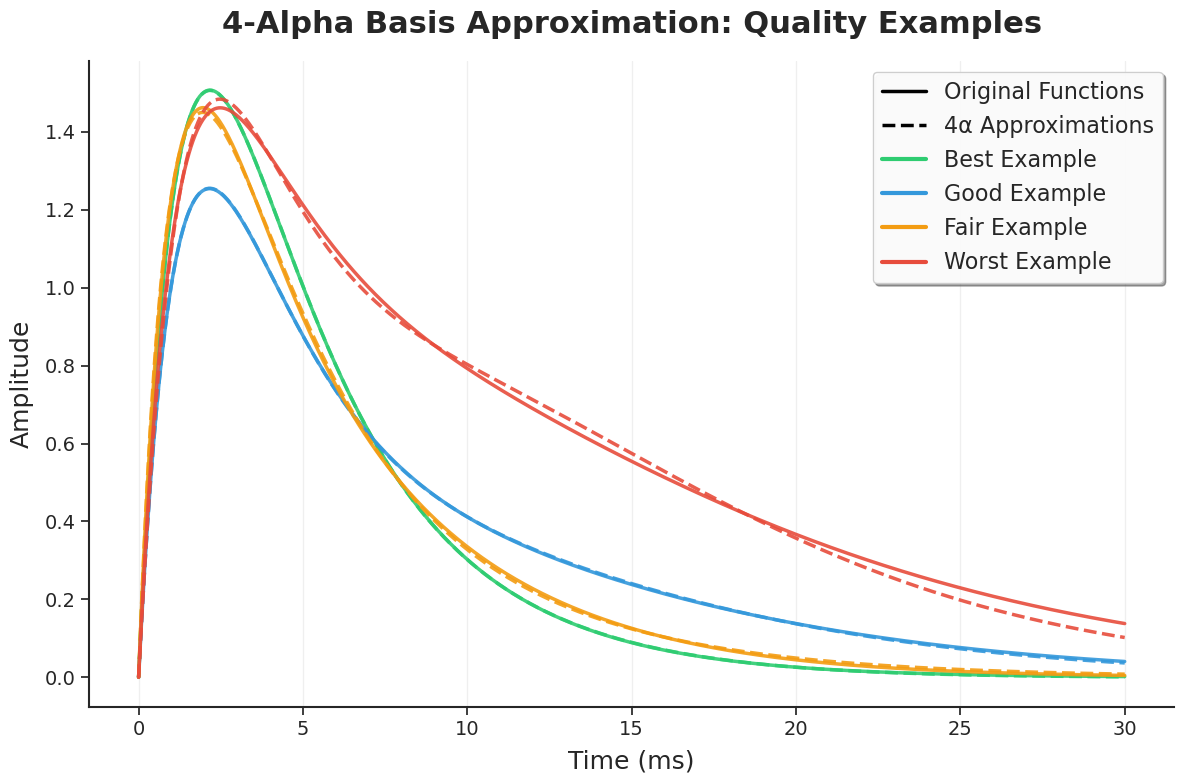

In [24]:
def create_4d_examples_showcase(enhanced_results, all_functions, t, double_alpha_params):
    """
    Create a single-panel figure showcasing best, worst, and additional examples for 4D approximation.
    """
    # Get 4D results
    result_4d = enhanced_results[4]
    
    # Find best and worst cases
    best_idx = np.argmin(result_4d['mse_per_function'])
    worst_idx = np.argmax(result_4d['mse_per_function'])
    
    # Find a couple of intermediate examples
    sorted_indices = np.argsort(result_4d['mse_per_function'])
    n_total = len(sorted_indices)
    
    # Select examples: best, 25th percentile, 75th percentile, worst
    examples = {
        'Best': best_idx,
        'Good': sorted_indices[n_total//4],
        'Fair': sorted_indices[3*n_total//4], 
        'Worst': worst_idx
    }
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Color scheme
    colors = {
        'Best': '#2ECC71',    # Green
        'Good': '#3498DB',    # Blue  
        'Fair': '#F39C12',    # Orange
        'Worst': '#E74C3C'    # Red
    }
    
    line_styles = {
        'Original': '-',
        'Approximation': '--'
    }
    
    # Plot each example with offset for clarity
    y_offsets = {'Best': 0.0, 'Good': 0.0, 'Fair': 0.0, 'Worst': 0.0}
    
    for i, (quality, idx) in enumerate(examples.items()):
        # Get data
        original_func = all_functions[idx]
        approx_func = n_alpha_approximation(t, result_4d['weights'][idx], result_4d['tau_basis'])
        
        # Calculate metrics
        mse = result_4d['mse_per_function'][idx]
        r2 = r2_score(original_func, approx_func)
        connection_name = double_alpha_params.iloc[idx]['Unnamed: 0']
        
        # Apply vertical offset
        y_offset = y_offsets[quality]
        
        # Plot original function
        ax.plot(t, original_func + y_offset, 
                color=colors[quality], linewidth=2.5, 
                linestyle=line_styles['Original'], alpha=0.9,
                label=f'{quality} - Original' if i == 0 else '')
        
        # Plot approximation
        ax.plot(t, approx_func + y_offset, 
                color=colors[quality], linewidth=2.5, 
                linestyle=line_styles['Approximation'], alpha=0.9,
                label=f'{quality} - 4α Approx' if i == 0 else '')
        
        # # Add quality label and metrics
        # ax.text(1, original_func.max() + y_offset + 0.05, 
        #         f'{quality}: {connection_name}\nMSE: {mse:.2e}, R²: {r2:.4f}',
        #         fontsize=11, fontweight='bold', color=colors[quality],
        #         verticalalignment='bottom',
        #         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
        #                  edgecolor=colors[quality], alpha=0.9, linewidth=1.5))
    
    # Customize plot
    ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.set_title('4-Alpha Basis Approximation: Quality Examples',
                fontsize=22, fontweight='bold', pad=20)
    
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='black', linewidth=2.5, linestyle='-', label='Original Functions'),
        Line2D([0], [0], color='black', linewidth=2.5, linestyle='--', label='4α Approximations')
    ]
    
    # Add quality color legend
    for quality, color in colors.items():
        legend_elements.append(Line2D([0], [0], color=color, linewidth=3, label=f'{quality} Example'))
    
    ax.legend(handles=legend_elements, loc='upper right', fontsize=16, 
              frameon=True, fancybox=True, shadow=True, framealpha=0.95)
    
    # Style improvements
    ax.grid(True, alpha=0.3, axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(labelsize=14)
    
    plt.tight_layout()
    return fig

# Create the showcase figure
print("Creating 4D examples showcase...")
showcase_fig = create_4d_examples_showcase(multi_dim_results, all_functions, t, double_alpha_params)
plt.show()

In [26]:
# Estimate the error in the approximation based on the total area under the curve for the worst examples, relative to the total area
def estimate_approximation_error(all_functions, approximations):
    """
    Estimate the error in the approximation based on the total area under the curve.
    
    Parameters:
    -----------
    all_functions : array
        Original functions (shape: n_functions x n_timepoints)
    approximations : array
        Approximated functions (shape: n_functions x n_timepoints)
    
    Returns:
    --------
    error_estimate : float
        Estimated error as a percentage of the total area.
    """
    total_area_original = np.sum(all_functions, axis=1) 
    total_area_approx = np.sum(approximations, axis=1)
    
    # Calculate absolute error for each function
    absolute_error = np.abs(total_area_original - total_area_approx)
    
    # Estimate error as a percentage of the original area
    error_estimate = np.max(absolute_error / np.abs(total_area_original)) * 100
    
    return error_estimate

# Estimate the approximation error for the 4D results
result_4d = multi_dim_results[4]
approximation_error = estimate_approximation_error(all_functions,
                                                   np.array([n_alpha_approximation(t,
                                                                 result_4d['weights'][i],
                                                                 result_4d['tau_basis'])
                                                             for i in range(len(all_functions))]))
print(f"Estimated approximation error for 4D basis: {approximation_error:.2f}%")

Estimated approximation error for 4D basis: 1.66%


Creating 3D 4D examples showcase...


/tmp/ipykernel_4023542/3460066915.py:107: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


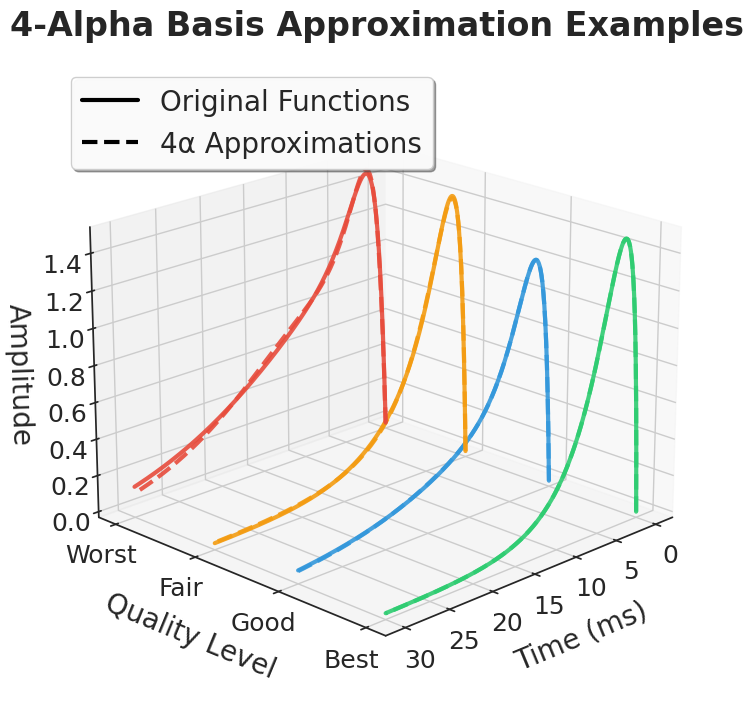

In [28]:
def create_4d_examples_showcase_3d(enhanced_results, all_functions, t, double_alpha_params):
    """
    Create a 3D figure showcasing best, worst, and additional examples for 4D approximation.
    Uses depth (z-axis) to separate different quality levels.
    """
    # Get 4D results
    result_4d = enhanced_results[4]
    
    # Find best and worst cases
    best_idx = np.argmin(result_4d['mse_per_function'])
    worst_idx = np.argmax(result_4d['mse_per_function'])
    
    # Find a couple of intermediate examples
    sorted_indices = np.argsort(result_4d['mse_per_function'])
    n_total = len(sorted_indices)
    
    # Select examples: best, 25th percentile, 75th percentile, worst
    examples = {
        'Best': best_idx,
        'Good': sorted_indices[n_total//4],
        'Fair': sorted_indices[3*n_total//4], 
        'Worst': worst_idx
    }
    
    # Create 3D figure
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Color scheme
    colors = {
        'Best': '#2ECC71',    # Green
        'Good': '#3498DB',    # Blue  
        'Fair': '#F39C12',    # Orange
        'Worst': '#E74C3C'    # Red
    }
    
    line_styles = {
        'Original': '-',
        'Approximation': '--'
    }
    
    # Depth positions for each quality level
    z_positions = {'Best': 3, 'Good': 2, 'Fair': 1, 'Worst': 0}
    
    for quality, idx in examples.items():
        # Get data
        original_func = all_functions[idx]
        approx_func = n_alpha_approximation(t, result_4d['weights'][idx], result_4d['tau_basis'])
        
        # Calculate metrics
        mse = result_4d['mse_per_function'][idx]
        r2 = r2_score(original_func, approx_func)
        connection_name = double_alpha_params.iloc[idx]['Unnamed: 0']
        
        # Z position for this quality level
        z_pos = z_positions[quality]
        z_array = np.full_like(t, z_pos)
        
        # Plot original function
        ax.plot(t, z_array, original_func, 
                color=colors[quality], linewidth=3, 
                linestyle=line_styles['Original'], alpha=0.9,
                label=f'{quality} - Original' if quality == 'Best' else '')
        
        # Plot approximation
        ax.plot(t, z_array, approx_func, 
                color=colors[quality], linewidth=3, 
                linestyle=line_styles['Approximation'], alpha=0.9,
                label=f'{quality} - 4α Approx' if quality == 'Best' else '')
    
    # Customize 3D plot with better label positioning
    ax.set_xlabel('Time (ms)', fontsize=20, labelpad=15)
    ax.set_ylabel('Quality Level', fontsize=20, labelpad=15)
    ax.set_zlabel('Amplitude', fontsize=20, labelpad=10)

    # Set y-axis labels for quality levels
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(['Worst', 'Fair', 'Good', 'Best'])
    
    # Set title
    ax.set_title('4-Alpha Basis Approximation Examples',
                fontsize=24, fontweight='bold', pad=20)
    
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='black', linewidth=3, linestyle='-', label='Original Functions'),
        Line2D([0], [0], color='black', linewidth=3, linestyle='--', label='4α Approximations')
    ]
    
    ax.legend(handles=legend_elements, loc='upper left', fontsize=20, 
              frameon=True, fancybox=True, shadow=True, framealpha=0.95)
    
    # Style improvements
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=18)
    
    # Set viewing angle for better visualization
    ax.view_init(elev=20, azim=45)
    
    # Force the z-axis label to appear by adjusting margins
    fig.subplots_adjust(left=0.4, right=0.8, top=0.9, bottom=0.1)
    
    # Alternative approach: manually set z-label position
    ax.zaxis.set_label_coords(0.1, 0.5)

    plt.tight_layout()
    
    return fig

# Create the 3D showcase figure
print("Creating 3D 4D examples showcase...")
showcase_3d_fig = create_4d_examples_showcase_3d(multi_dim_results, all_functions, t, double_alpha_params)
plt.show()

Creating 4-alpha basis functions plot...


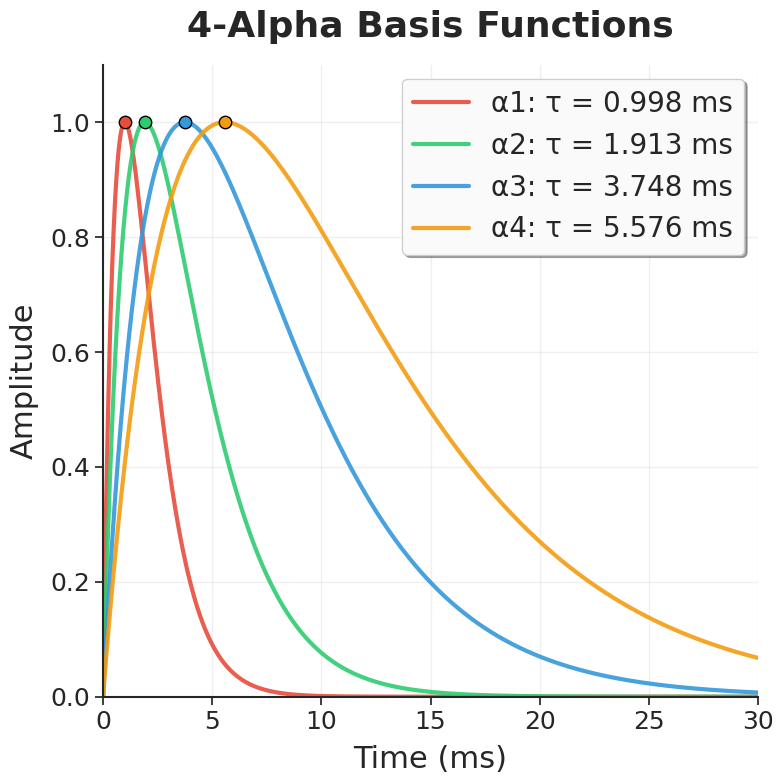


Creating multi-dimensional basis functions comparison...


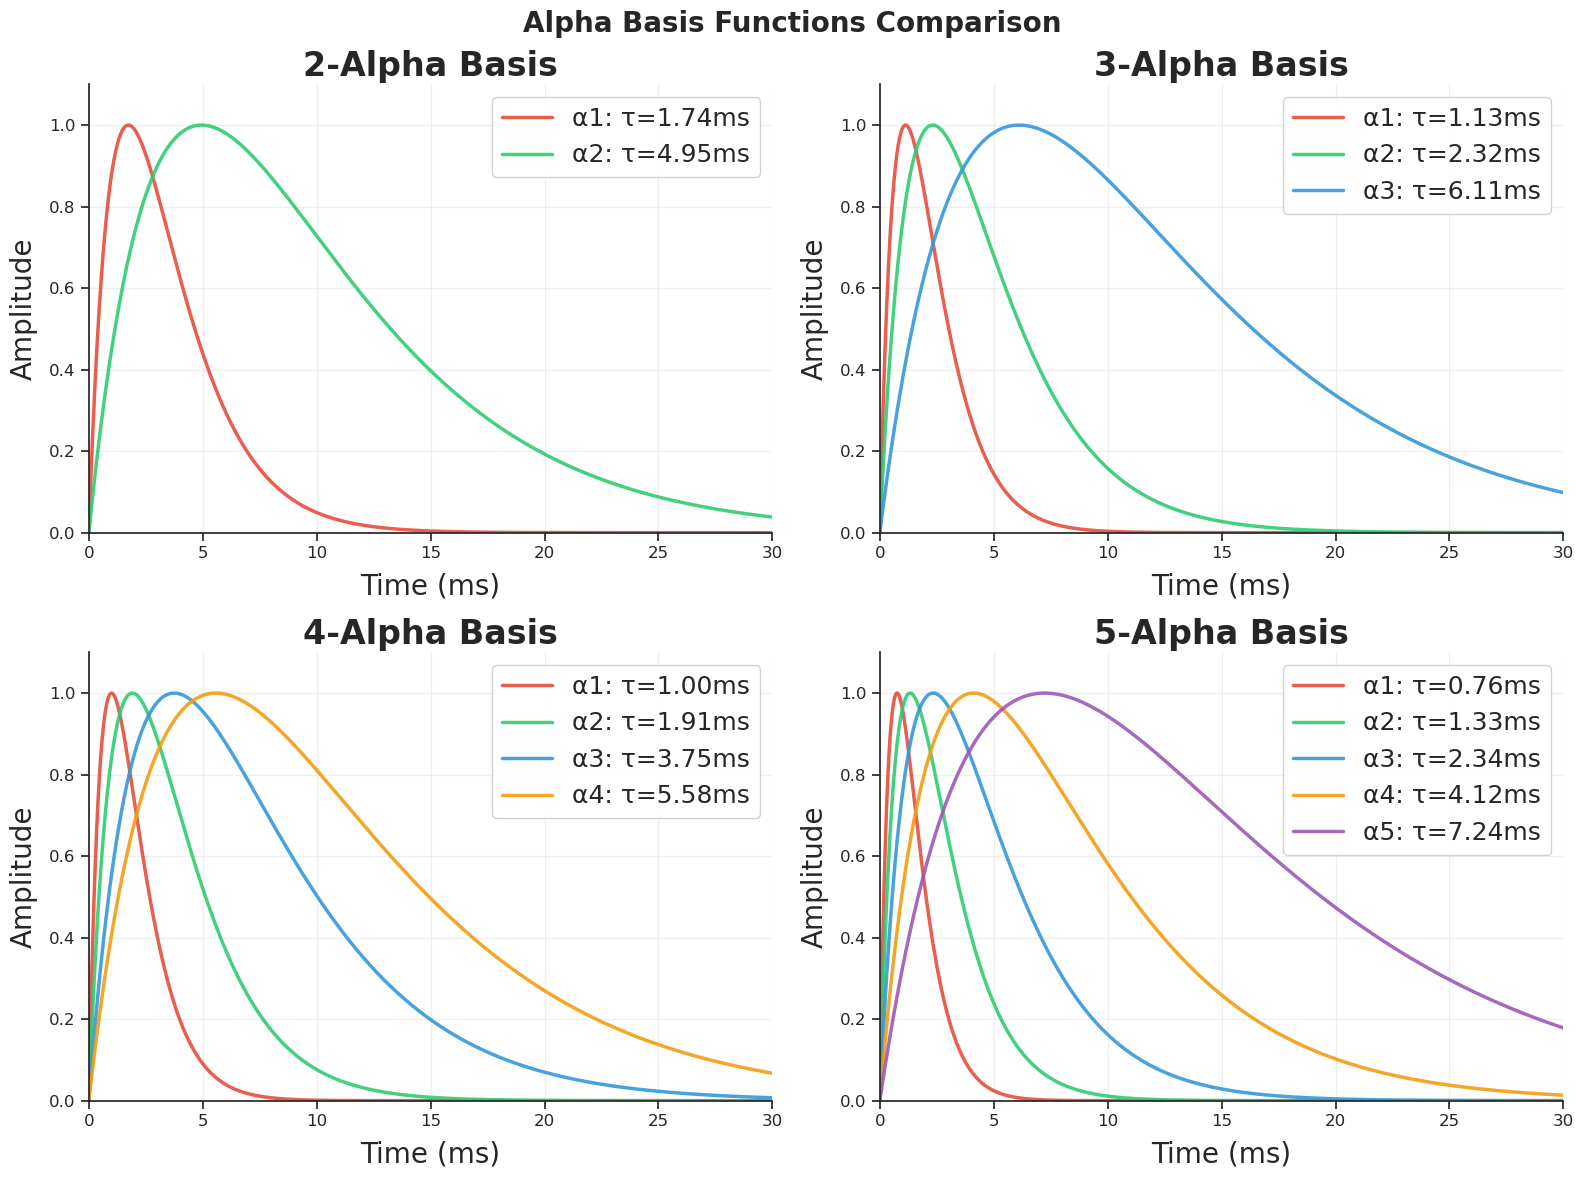

In [30]:
def plot_alpha_basis_functions(enhanced_results, n_dims=4, t_max=30, save_path=None):
    """
    Create a publication-quality plot of the alpha basis functions for a given dimension.
    
    Parameters:
    -----------
    enhanced_results : dict
        Results from enhanced optimization containing tau values
    n_dims : int
        Dimension of alpha basis to plot (default: 4)
    t_max : float
        Maximum time to plot (default: 30 ms)
    save_path : str, optional
        Path to save the figure
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes
    """
    # Get the tau basis for the specified dimension
    tau_basis = enhanced_results[n_dims]['tau_basis']
    
    # Create time vector with high resolution for smooth curves
    t = np.linspace(0, t_max, 2000)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Color palette for the basis functions
    colors = ['#E74C3C', '#2ECC71', '#3498DB', '#F39C12', '#9B59B6', '#1ABC9C', '#E67E22']
    
    # Plot each alpha basis function
    for i, tau in enumerate(tau_basis):
        alpha_func = alpha_function(t, tau)
        ax.plot(t, alpha_func, linewidth=3, color=colors[i % len(colors)], 
                label=f'α{i+1}: τ = {tau:.3f} ms', alpha=0.9)
        
        # Add peak marker
        peak_time = tau  # Peak occurs at t = tau for alpha function
        peak_value = alpha_function(peak_time, tau)
        ax.scatter(peak_time, peak_value, color=colors[i % len(colors)], 
                  s=80, zorder=10, edgecolor='black', linewidth=1)
    
    # Customize the plot
    ax.set_xlabel('Time (ms)', fontsize=22)
    ax.set_ylabel('Amplitude', fontsize=22)
    ax.set_title(f'{n_dims}-Alpha Basis Functions', fontsize=26, fontweight='bold', pad=20)

    # Configure legend
    ax.legend(loc='upper right', fontsize=20, frameon=True, 
              fancybox=True, shadow=True, framealpha=0.95)
    
    # Grid and styling
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(labelsize=18)
    
    # Set reasonable limits
    ax.set_xlim(0, t_max)
    ax.set_ylim(0, 1.1)  # Alpha functions are normalized to peak at 1
    
    plt.tight_layout()
    
    # # Save if path provided
    # if save_path:
    #     plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig, ax

def plot_alpha_basis_comparison(enhanced_results, dimensions=[2, 3, 4, 5], 
                               t_max=30, save_path=None):
    """
    Create a comparison plot of alpha basis functions for different dimensions.
    
    Parameters:
    -----------
    enhanced_results : dict
        Results from enhanced optimization containing tau values
    dimensions : list
        List of dimensions to compare (default: [2, 3, 4, 5])
    t_max : float
        Maximum time to plot (default: 30 ms)
    save_path : str, optional
        Path to save the figure
    
    Returns:
    --------
    fig, axes : matplotlib figure and axes
    """
    # Create subplots
    n_dims = len(dimensions)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # Color palette
    colors = ['#E74C3C', '#2ECC71', '#3498DB', '#F39C12', '#9B59B6', '#1ABC9C', '#E67E22']
    
    # Time vector
    t = np.linspace(0, t_max, 2000)
    
    for idx, dim in enumerate(dimensions):
        ax = axes[idx]
        tau_basis = enhanced_results[dim]['tau_basis']
        
        # Plot each alpha function for this dimension
        for i, tau in enumerate(tau_basis):
            alpha_func = alpha_function(t, tau)
            ax.plot(t, alpha_func, linewidth=2.5, color=colors[i % len(colors)], 
                    label=f'α{i+1}: τ={tau:.2f}ms', alpha=0.9)
        
        # Customize subplot
        ax.set_xlabel('Time (ms)', fontsize=20)
        ax.set_ylabel('Amplitude', fontsize=20)
        ax.set_title(f'{dim}-Alpha Basis', fontsize=24, fontweight='bold')
        ax.legend(fontsize=18, frameon=True, framealpha=0.9)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, t_max)
        ax.set_ylim(0, 1.1)
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(labelsize=12)
    
    plt.suptitle('Alpha Basis Functions Comparison', fontsize=20, fontweight='bold')
    plt.tight_layout()
    
    # # Save if path provided
    # if save_path:
    #     plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig, axes

# Create the 4-alpha basis functions plot
print("Creating 4-alpha basis functions plot...")
basis_fig, basis_ax = plot_alpha_basis_functions(multi_dim_results, n_dims=4, 
                                                save_path='4_alpha_basis_functions.png')
plt.show()

# Create comparison plot for multiple dimensions
print("\nCreating multi-dimensional basis functions comparison...")
comparison_fig, comparison_axes = plot_alpha_basis_comparison(multi_dim_results, 
                                                            dimensions=[2, 3, 4, 5],
                                                            save_path='alpha_basis_comparison.png')
plt.show()

Creating modern dot plot analysis...


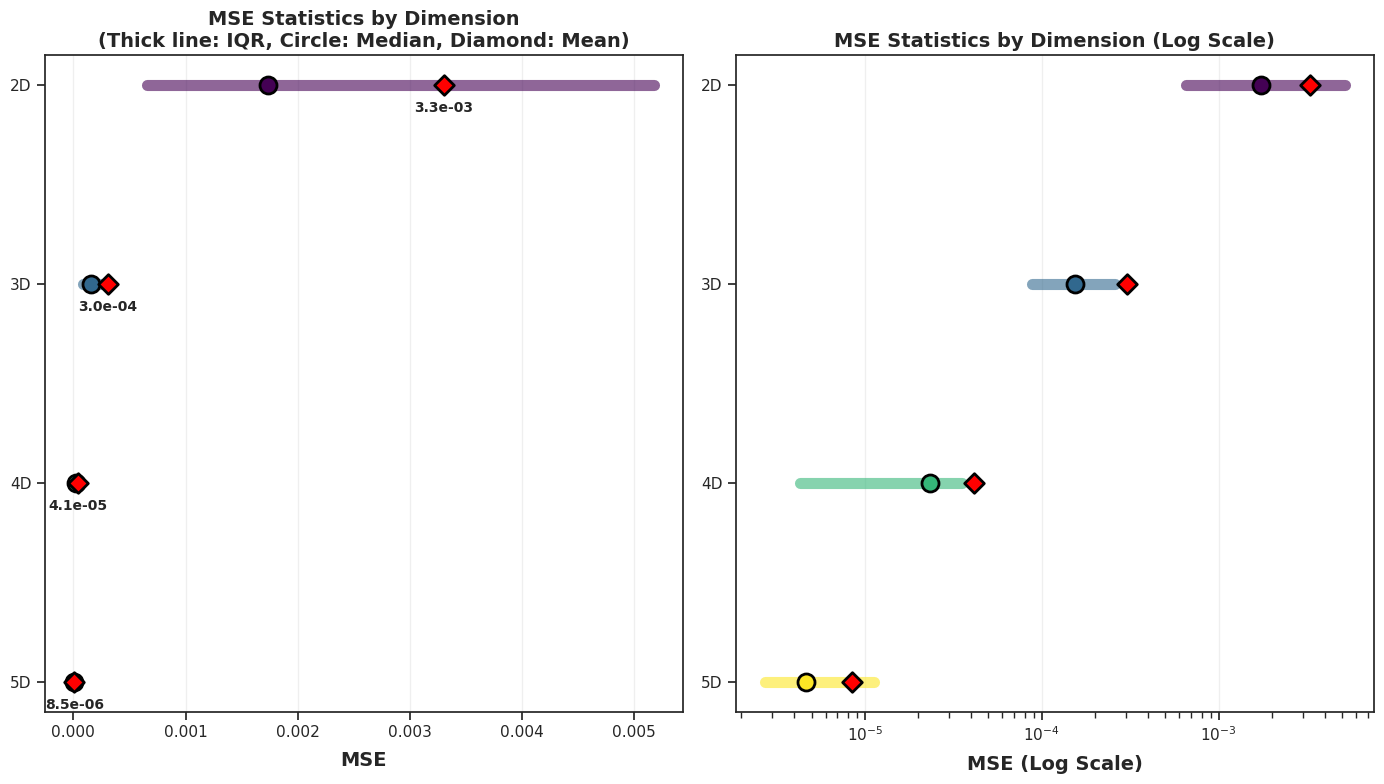

In [31]:
def create_dot_plot_mse_analysis(multi_dim_results, dimensions_to_test):
    """
    Create modern dot plot showing MSE statistics for each dimension.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
    
    # Prepare statistics
    stats_data = []
    for n_dims in dimensions_to_test:
        mse_values = multi_dim_results[n_dims]['mse_per_function']
        stats_data.append({
            'dimension': n_dims,
            'mean': np.mean(mse_values),
            'median': np.median(mse_values),
            'q25': np.percentile(mse_values, 25),
            'q75': np.percentile(mse_values, 75),
            'min': np.min(mse_values),
            'max': np.max(mse_values),
            'std': np.std(mse_values)
        })
    
    stats_df = pd.DataFrame(stats_data)
    
    # Plot 1: Linear scale with confidence intervals
    colors = plt.cm.viridis(np.linspace(0, 1, len(dimensions_to_test)))
    
    for i, (_, row) in enumerate(stats_df.iterrows()):
        # Plot confidence interval
        ax1.plot([row['q25'], row['q75']], [i, i], color=colors[i], 
                linewidth=8, alpha=0.6, solid_capstyle='round')
        
        # Plot median
        ax1.scatter(row['median'], i, color=colors[i], s=150, 
                   edgecolor='black', linewidth=2, zorder=10)
        
        # Plot mean as diamond
        ax1.scatter(row['mean'], i, marker='D', color='red', s=100, 
                   edgecolor='black', linewidth=2, zorder=11)
        
        # Add text annotation
        ax1.text(row['mean'], i + 0.15, f'{row["mean"]:.1e}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax1.set_yticks(range(len(dimensions_to_test)))
    ax1.set_yticklabels([f'{n}D' for n in dimensions_to_test])
    ax1.set_xlabel('MSE', fontsize=14, fontweight='bold')
    ax1.set_title('MSE Statistics by Dimension\n(Thick line: IQR, Circle: Median, Diamond: Mean)', 
                 fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    ax1.invert_yaxis()
    
    # Plot 2: Log scale
    for i, (_, row) in enumerate(stats_df.iterrows()):
        ax2.plot([row['q25'], row['q75']], [i, i], color=colors[i], 
                linewidth=8, alpha=0.6, solid_capstyle='round')
        ax2.scatter(row['median'], i, color=colors[i], s=150, 
                   edgecolor='black', linewidth=2, zorder=10)
        ax2.scatter(row['mean'], i, marker='D', color='red', s=100, 
                   edgecolor='black', linewidth=2, zorder=11)
    
    ax2.set_yticks(range(len(dimensions_to_test)))
    ax2.set_yticklabels([f'{n}D' for n in dimensions_to_test])
    ax2.set_xlabel('MSE (Log Scale)', fontsize=14, fontweight='bold')
    ax2.set_title('MSE Statistics by Dimension (Log Scale)', fontsize=14, fontweight='bold')
    ax2.set_xscale('log')
    ax2.grid(True, alpha=0.3, axis='x')
    ax2.invert_yaxis()
    
    plt.tight_layout()
    return fig

# Create the modern dot plot analysis
print("Creating modern dot plot analysis...")
dot_plot_fig = create_dot_plot_mse_analysis(multi_dim_results, dimensions_to_test)
plt.show()

Creating comprehensive summary analysis...


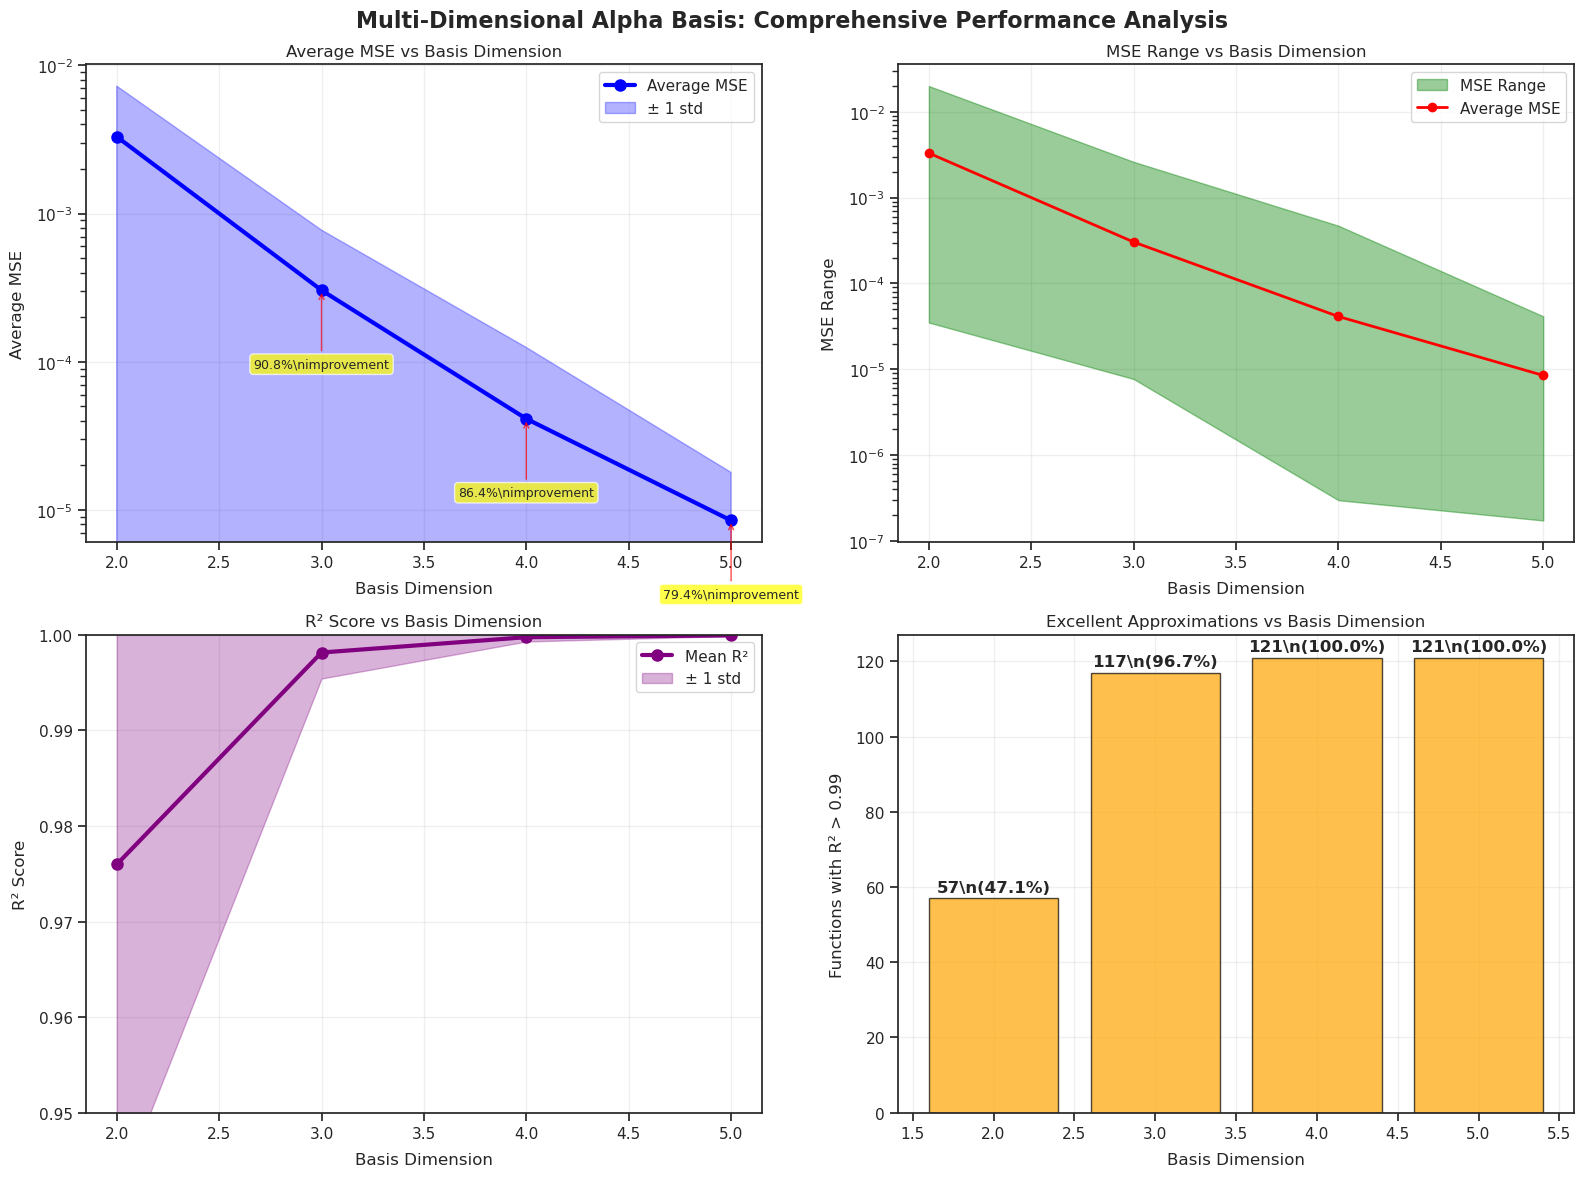

\n================================================================================
MULTI-DIMENSIONAL ALPHA BASIS: COMPREHENSIVE ANALYSIS SUMMARY
\nAnalyzed dimensions: [2, 3, 4, 5]
Number of functions approximated: 121
Time window: 0-30 ms with 1000 time points
Optimization method: Mean square error minimization
\nPERFORMANCE BY DIMENSION:
--------------------------------------------------
\n2D BASIS:
  • Tau values: ['1.737', '4.947']
  • Average MSE: 3.30e-03
  • Mean R²: 0.9760
  • Excellent (R²>0.99): 57/121 (47.1%)
  • Good (0.95<R²≤0.99): 45/121 (37.2%)
\n3D BASIS:
  • Tau values: ['1.130', '2.323', '6.110']
  • Average MSE: 3.04e-04
  • Mean R²: 0.9981
  • Excellent (R²>0.99): 117/121 (96.7%)
  • Good (0.95<R²≤0.99): 4/121 (3.3%)
\n4D BASIS:
  • Tau values: ['0.998', '1.913', '3.748', '5.576']
  • Average MSE: 4.13e-05
  • Mean R²: 0.9998
  • Excellent (R²>0.99): 121/121 (100.0%)
  • Good (0.95<R²≤0.99): 0/121 (0.0%)
\n5D BASIS:
  • Tau values: ['0.758', '1.332', '2.342', '4.118

In [32]:
def create_comprehensive_summary_analysis(multi_dim_results, dimensions_to_test):
    """
    Create comprehensive summary analysis of performance across dimensions.
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Extract performance metrics
    avg_mses = [multi_dim_results[n]['avg_mse'] for n in dimensions_to_test]
    std_mses = [np.std(multi_dim_results[n]['mse_per_function']) for n in dimensions_to_test]
    max_mses = [np.max(multi_dim_results[n]['mse_per_function']) for n in dimensions_to_test]
    min_mses = [np.min(multi_dim_results[n]['mse_per_function']) for n in dimensions_to_test]
    
    # 1. Average MSE vs Dimension
    ax1.plot(dimensions_to_test, avg_mses, 'o-', linewidth=3, markersize=8, 
             color='blue', label='Average MSE')
    ax1.fill_between(dimensions_to_test, 
                     [avg - std for avg, std in zip(avg_mses, std_mses)],
                     [avg + std for avg, std in zip(avg_mses, std_mses)],
                     alpha=0.3, color='blue', label='± 1 std')
    ax1.set_xlabel('Basis Dimension')
    ax1.set_ylabel('Average MSE')
    ax1.set_title('Average MSE vs Basis Dimension')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Add improvement percentages
    for i, (dim, mse) in enumerate(zip(dimensions_to_test[1:], avg_mses[1:]), 1):
        prev_mse = avg_mses[i-1]
        improvement = (prev_mse - mse) / prev_mse * 100
        ax1.annotate(f'{improvement:.1f}%\\nimprovement', 
                    xy=(dim, mse), xytext=(dim, mse*0.3),
                    ha='center', fontsize=9,
                    arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    # 2. MSE Range (min to max) vs Dimension
    ax2.fill_between(dimensions_to_test, min_mses, max_mses, 
                     alpha=0.4, color='green', label='MSE Range')
    ax2.plot(dimensions_to_test, avg_mses, 'o-', linewidth=2, markersize=6,
             color='red', label='Average MSE')
    ax2.set_xlabel('Basis Dimension')
    ax2.set_ylabel('MSE Range')
    ax2.set_title('MSE Range vs Basis Dimension')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # 3. R² score analysis
    r2_means = []
    r2_stds = []
    excellent_counts = []
    
    for n_dims in dimensions_to_test:
        result = multi_dim_results[n_dims]
        
        # Compute R² for all functions
        r2_scores = []
        for i in range(len(all_functions)):
            original = all_functions[i]
            approx = n_alpha_approximation(t, result['weights'][i], result['tau_basis'])
            r2 = r2_score(original, approx)
            r2_scores.append(r2)
        
        r2_means.append(np.mean(r2_scores))
        r2_stds.append(np.std(r2_scores))
        excellent_counts.append(np.sum(np.array(r2_scores) > 0.99))
    
    ax3.plot(dimensions_to_test, r2_means, 'o-', linewidth=3, markersize=8,
             color='purple', label='Mean R²')
    ax3.fill_between(dimensions_to_test,
                     [mean - std for mean, std in zip(r2_means, r2_stds)],
                     [mean + std for mean, std in zip(r2_means, r2_stds)],
                     alpha=0.3, color='purple', label='± 1 std')
    ax3.set_xlabel('Basis Dimension')
    ax3.set_ylabel('R² Score')
    ax3.set_title('R² Score vs Basis Dimension')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_ylim([0.95, 1.0])
    
    # 4. Number of excellent approximations
    ax4.bar(dimensions_to_test, excellent_counts, alpha=0.7, color='orange', 
            edgecolor='black', linewidth=1)
    ax4.set_xlabel('Basis Dimension')
    ax4.set_ylabel('Functions with R² > 0.99')
    ax4.set_title('Excellent Approximations vs Basis Dimension')
    ax4.grid(True, alpha=0.3)
    
    # Add percentage labels on bars
    total_functions = len(all_functions)
    for i, (dim, count) in enumerate(zip(dimensions_to_test, excellent_counts)):
        percentage = count / total_functions * 100
        ax4.text(dim, count + 1, f'{count}\\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.suptitle('Multi-Dimensional Alpha Basis: Comprehensive Performance Analysis', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig, {
        'avg_mses': avg_mses,
        'r2_means': r2_means,
        'excellent_counts': excellent_counts
    }

def print_final_summary(multi_dim_results, dimensions_to_test):
    """
    Print a comprehensive final summary of the multi-dimensional analysis.
    """
    print("\\n" + "="*80)
    print("MULTI-DIMENSIONAL ALPHA BASIS: COMPREHENSIVE ANALYSIS SUMMARY")
    print("="*80)
    
    print(f"\\nAnalyzed dimensions: {dimensions_to_test}")
    print(f"Number of functions approximated: {len(all_functions)}")
    print(f"Time window: 0-30 ms with {len(t)} time points")
    print(f"Optimization method: Mean square error minimization")
    
    print(f"\\nPERFORMANCE BY DIMENSION:")
    print("-" * 50)
    
    for n_dims in dimensions_to_test:
        result = multi_dim_results[n_dims]
        
        # Compute R² statistics
        r2_scores = []
        for i in range(len(all_functions)):
            original = all_functions[i]
            approx = n_alpha_approximation(t, result['weights'][i], result['tau_basis'])
            r2 = r2_score(original, approx)
            r2_scores.append(r2)
        
        excellent = np.sum(np.array(r2_scores) > 0.99)
        good = np.sum((np.array(r2_scores) > 0.95) & (np.array(r2_scores) <= 0.99))
        
        print(f"\\n{n_dims}D BASIS:")
        print(f"  • Tau values: {[f'{tau:.3f}' for tau in result['tau_basis']]}")
        print(f"  • Average MSE: {result['avg_mse']:.2e}")
        print(f"  • Mean R²: {np.mean(r2_scores):.4f}")
        print(f"  • Excellent (R²>0.99): {excellent}/121 ({100*excellent/121:.1f}%)")
        print(f"  • Good (0.95<R²≤0.99): {good}/121 ({100*good/121:.1f}%)")
    
    print(f"\\nIMPROVEMENT ANALYSIS:")
    print("-" * 30)
    
    base_mse = multi_dim_results[2]['avg_mse']
    for n_dims in dimensions_to_test[1:]:
        current_mse = multi_dim_results[n_dims]['avg_mse']
        improvement = (base_mse - current_mse) / base_mse * 100
        print(f"  • {n_dims}D vs 2D: {improvement:.1f}% MSE reduction")
    
    print(f"\\nDIMINISHING RETURNS ANALYSIS:")
    print("-" * 35)
    
    for i in range(1, len(dimensions_to_test)):
        prev_mse = multi_dim_results[dimensions_to_test[i-1]]['avg_mse']
        curr_mse = multi_dim_results[dimensions_to_test[i]]['avg_mse']
        marginal_improvement = (prev_mse - curr_mse) / prev_mse * 100
        print(f"  • {dimensions_to_test[i]}D vs {dimensions_to_test[i-1]}D: {marginal_improvement:.1f}% improvement")
    
    # Find optimal dimension based on diminishing returns
    marginal_improvements = []
    for i in range(1, len(dimensions_to_test)):
        prev_mse = multi_dim_results[dimensions_to_test[i-1]]['avg_mse']
        curr_mse = multi_dim_results[dimensions_to_test[i]]['avg_mse']
        marginal_improvement = (prev_mse - curr_mse) / prev_mse * 100
        marginal_improvements.append(marginal_improvement)
    
    # Find where improvement drops below threshold (e.g., 10%)
    optimal_dim_idx = next((i for i, imp in enumerate(marginal_improvements) if imp < 10), len(marginal_improvements)-1)
    optimal_dim = dimensions_to_test[min(optimal_dim_idx + 1, len(dimensions_to_test)-1)]
    
    print(f"\\nRECOMMENDATION:")
    print("-" * 15)
    print(f"  • Optimal dimension appears to be {optimal_dim}D")
    print(f"  • Beyond {optimal_dim}D, improvements become marginal (<10%)")
    print(f"  • {optimal_dim}D provides excellent approximations for")
    
    # Count excellent for optimal dimension
    result = multi_dim_results[optimal_dim]
    r2_scores = []
    for i in range(len(all_functions)):
        original = all_functions[i]
        approx = n_alpha_approximation(t, result['weights'][i], result['tau_basis'])
        r2 = r2_score(original, approx)
        r2_scores.append(r2)
    excellent = np.sum(np.array(r2_scores) > 0.99)
    
    print(f"    {excellent}/121 ({100*excellent/121:.1f}%) of all functions")
    print("="*80)

# Create comprehensive analysis
print("Creating comprehensive summary analysis...")
summary_fig, summary_stats = create_comprehensive_summary_analysis(multi_dim_results, dimensions_to_test)
plt.show()

# Print final summary
print_final_summary(multi_dim_results, dimensions_to_test)

In [33]:
# Save multi-dimensional results for future use
# import pickle

# # Save the complete multi-dimensional results
# save_path_multi = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/multi_dim_alpha_results.pkl'

# with open(save_path_multi, 'wb') as f:
#     pickle.dump(multi_dim_results, f)

# print(f"Multi-dimensional results saved to: {save_path_multi}")

# Save a summary CSV for easy access
summary_data = []
for n_dims in dimensions_to_test:
    result = multi_dim_results[n_dims]
    
    # Compute R² statistics
    r2_scores = []
    for i in range(len(all_functions)):
        original = all_functions[i]
        approx = n_alpha_approximation(t, result['weights'][i], result['tau_basis'])
        r2 = r2_score(original, approx)
        r2_scores.append(r2)
    
    excellent = np.sum(np.array(r2_scores) > 0.99)
    good = np.sum((np.array(r2_scores) > 0.95) & (np.array(r2_scores) <= 0.99))
    
    summary_data.append({
        'dimension': n_dims,
        'avg_mse': result['avg_mse'],
        'mean_r2': np.mean(r2_scores),
        'excellent_count': excellent,
        'good_count': good,
        'excellent_percent': 100 * excellent / 121,
        'tau_values': ', '.join([f'{tau:.3f}' for tau in result['tau_basis']])
    })

summary_df = pd.DataFrame(summary_data)
# summary_csv_path = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/multi_dim_summary.csv'
# summary_df.to_csv(summary_csv_path, index=False)

# print(f"Summary CSV saved to: {summary_csv_path}")
print("\\nSummary of all dimensions:")
print(summary_df.to_string(index=False))

\nSummary of all dimensions:
 dimension  avg_mse  mean_r2  excellent_count  good_count  excellent_percent                        tau_values
         2 0.003304 0.975970               57          45          47.107438                      1.737, 4.947
         3 0.000304 0.998149              117           4          96.694215               1.130, 2.323, 6.110
         4 0.000041 0.999753              121           0         100.000000        0.998, 1.913, 3.748, 5.576
         5 0.000008 0.999939              121           0         100.000000 0.758, 1.332, 2.342, 4.118, 7.238


## Enhanced multidimensional n-alpha basis optimization

In [34]:
# Enhanced optimization methods for better fitting
from scipy.optimize import minimize, differential_evolution, basinhopping
import warnings
warnings.filterwarnings('ignore')

def enhanced_alpha_approximation_optimizer(all_functions, t, n_dims, max_iterations=50):
    """
    Enhanced optimization for alpha function basis with multiple advanced strategies.
    
    Uses:
    1. Global optimization with differential evolution
    2. Basin hopping for escaping local minima
    3. Multi-start optimization with smart initialization
    4. Adaptive parameter bounds based on data characteristics
    """
    
    # Analyze the tau parameters in the original double alpha functions
    tau_fast = double_alpha_params['tau_syn'].values
    tau_slow = double_alpha_params['tau_syn_slow'].values
    all_tau_values = np.concatenate([tau_fast, tau_slow])
    
    min_tau, max_tau = 0.1, 15.0  # Conservative bounds
    n_functions = all_functions.shape[0]
    
    def objective_function(params):
        """Enhanced objective function."""
        tau_params = params[:n_dims]
        
        # Ensure tau values are sorted for stability
        tau_params = np.sort(tau_params)
        
        # Create design matrix
        design_matrix = np.zeros((len(t), n_dims))
        for j, tau in enumerate(tau_params):
            design_matrix[:, j] = alpha_function(t, tau)
        
        # Add small regularization to avoid singular matrices
        design_matrix += 1e-12 * np.eye(len(t), n_dims)
        
        total_mse = 0
        for i in range(n_functions):
            try:
                weights, residuals, rank, s = np.linalg.lstsq(design_matrix, all_functions[i], rcond=1e-10)
                
                # Compute approximation
                approx = np.zeros_like(t)
                for j, (w, tau) in enumerate(zip(weights, tau_params)):
                    approx += w * alpha_function(t, tau)
                
                mse = np.mean((all_functions[i] - approx)**2)
                total_mse += mse
                
            except np.linalg.LinAlgError:
                return 1e6  # Large penalty for singular matrices
        
        avg_mse = total_mse / n_functions
        
        return avg_mse
    
    print(f"  Enhanced optimization for {n_dims}D basis...")
    
    # Strategy 1: Differential Evolution (Global optimization)
    print("    Strategy 1: Differential Evolution...")
    bounds = [(min_tau, max_tau)] * n_dims
    
    de_result = differential_evolution(
        objective_function, 
        bounds, 
        maxiter=1000, 
        popsize=15,
        atol=1e-8,
        seed=42,
        workers=1
    )
    
    best_result = {
        'tau_basis': np.sort(de_result.x),
        'mse': de_result.fun,
        'method': 'Differential Evolution'
    }
    
    print(f"      DE result: MSE = {de_result.fun:.8f}")
    
    # Strategy 2: Basin Hopping with multiple starting points
    print("    Strategy 2: Basin Hopping...")
    
    # Smart initialization based on data quantiles
    quantiles = np.linspace(5, 95, n_dims)
    smart_init = np.percentile(all_tau_values, quantiles)
    
    def basin_hop_callback(x, f, accept):
        if f < best_result['mse']:
            print(f"      New best from Basin Hopping: MSE = {f:.8f}")
    
    bh_result = basinhopping(
        objective_function,
        smart_init,
        niter=300,
        T=0.01,
        stepsize=0.5,
        minimizer_kwargs={
            'method': 'L-BFGS-B',
            'bounds': bounds
        },
        callback=basin_hop_callback,
        seed=42
    )
    
    if bh_result.fun < best_result['mse']:
        best_result = {
            'tau_basis': np.sort(bh_result.x),
            'mse': bh_result.fun,
            'method': 'Basin Hopping'
        }
    
    # Strategy 3: Multi-start L-BFGS-B with smart initializations
    print("    Strategy 3: Multi-start optimization...")
    
    initialization_strategies = [
        np.logspace(np.log10(min_tau), np.log10(max_tau), n_dims),  # Log-spaced
        np.linspace(min_tau, max_tau, n_dims),  # Linear
        np.percentile(all_tau_values, np.linspace(10, 90, n_dims)),  # Data-driven
        np.sort(np.random.uniform(min_tau, max_tau, n_dims)),  # Random 1
        np.sort(np.random.uniform(min_tau, max_tau, n_dims)),  # Random 2
    ]
    
    for i, init in enumerate(initialization_strategies):
        result = minimize(
            objective_function,
            init,
            method='L-BFGS-B',
            bounds=bounds,
            options={'maxiter': 200, 'ftol': 1e-10}
        )
        
        if result.success and result.fun < best_result['mse']:
            best_result = {
                'tau_basis': np.sort(result.x),
                'mse': result.fun,
                'method': f'Multi-start #{i+1}'
            }
            print(f"      New best from Multi-start #{i+1}: MSE = {result.fun:.8f}")
    
    # Final refinement with very tight tolerances
    print("    Final refinement...")
    final_result = minimize(
        objective_function,
        best_result['tau_basis'],
        method='L-BFGS-B',
        bounds=bounds,
        options={
            'maxiter': 5000,
            'ftol': 1e-12,
            'gtol': 1e-12
        }
    )
    
    if final_result.success and final_result.fun < best_result['mse']:
        best_result = {
            'tau_basis': np.sort(final_result.x),
            'mse': final_result.fun,
            'method': 'Final Refinement'
        }
        print(f"      Final refinement improved to: MSE = {final_result.fun:.8f}")
    
    # Compute final weights and detailed metrics
    optimal_tau = best_result['tau_basis']
    design_matrix = np.zeros((len(t), n_dims))
    for j, tau in enumerate(optimal_tau):
        design_matrix[:, j] = alpha_function(t, tau)
    
    final_weights = np.zeros((n_functions, n_dims))
    mse_per_function = np.zeros(n_functions)
    r2_per_function = np.zeros(n_functions)
    
    for i in range(n_functions):
        weights, _, _, _ = np.linalg.lstsq(design_matrix, all_functions[i], rcond=1e-10)
        final_weights[i] = weights
        
        # Compute approximation
        approx = np.zeros_like(t)
        for j, (w, tau) in enumerate(zip(weights, optimal_tau)):
            approx += w * alpha_function(t, tau)
        
        mse = np.mean((all_functions[i] - approx)**2)
        r2 = 1 - np.sum((all_functions[i] - approx)**2) / np.sum((all_functions[i] - np.mean(all_functions[i]))**2)
        
        mse_per_function[i] = mse
        r2_per_function[i] = r2
    
    print(f"    Best method: {best_result['method']}")
    print(f"    Final MSE: {best_result['mse']:.8f}")
    print(f"    Mean R²: {np.mean(r2_per_function):.6f}")
    
    return {
        'tau_basis': optimal_tau,
        'weights': final_weights,
        'avg_mse': best_result['mse'],
        'mse_per_function': mse_per_function,
        'r2_per_function': r2_per_function,
        'mean_r2': np.mean(r2_per_function),
        'n_dims': n_dims,
        'optimization_method': best_result['method']
    }

In [35]:
# Apply enhanced optimization for multiple dimensions
print("ENHANCED MULTI-DIMENSIONAL ALPHA BASIS OPTIMIZATION")
print("=" * 70)
print("Using advanced optimization strategies:")
print("• Differential Evolution for global search")
print("• Basin Hopping for escaping local minima") 
print("• Multi-start optimization with smart initialization")
print("• Regularization for numerical stability")
print("=" * 70)

# Test dimensions from 2 to 7 for comprehensive analysis
enhanced_dimensions = [2, 3, 4, 5]#, 6, 7]
enhanced_results = {}

for n_dims in enhanced_dimensions:
    print(f"\nOptimizing {n_dims}-dimensional alpha basis...")
    print("-" * 50)
    
    result = enhanced_alpha_approximation_optimizer(all_functions, t, n_dims)
    enhanced_results[n_dims] = result
    
    print(f"  Final tau values: {result['tau_basis']}")
    print(f"  Average MSE: {result['avg_mse']:.8f}")
    print(f"  Mean R²: {result['mean_r2']:.6f}")
    print(f"  Optimization method: {result['optimization_method']}")

print("\n" + "=" * 70)
print("ENHANCED OPTIMIZATION SUMMARY")
print("=" * 70)

# Find the best dimension based on different criteria
best_mse_dim = min(enhanced_results.keys(), key=lambda k: enhanced_results[k]['avg_mse'])
best_r2_dim = max(enhanced_results.keys(), key=lambda k: enhanced_results[k]['mean_r2'])

print(f"\nBest MSE: {enhanced_results[best_mse_dim]['avg_mse']:.8f} ({best_mse_dim}D)")
print(f"Best R²: {enhanced_results[best_r2_dim]['mean_r2']:.6f} ({best_r2_dim}D)")

print(f"\nDetailed Results:")
for n_dims in enhanced_dimensions:
    result = enhanced_results[n_dims]
    print(f"{n_dims}D: MSE={result['avg_mse']:.8f}, R²={result['mean_r2']:.6f}, Method={result['optimization_method']}")

# Analyze improvement over baseline
if 'multi_dim_results' in globals() and len(multi_dim_results) > 0:
    print(f"\nImprovement Analysis:")
    for n_dims in enhanced_dimensions:
        if n_dims in multi_dim_results:
            old_mse = multi_dim_results[n_dims]['avg_mse']
            new_mse = enhanced_results[n_dims]['avg_mse']
            improvement = (old_mse - new_mse) / old_mse * 100
            print(f"{n_dims}D: {improvement:.2f}% improvement in MSE")

print("=" * 70)

ENHANCED MULTI-DIMENSIONAL ALPHA BASIS OPTIMIZATION
Using advanced optimization strategies:
• Differential Evolution for global search
• Basin Hopping for escaping local minima
• Multi-start optimization with smart initialization
• Regularization for numerical stability

Optimizing 2-dimensional alpha basis...
--------------------------------------------------
  Enhanced optimization for 2D basis...
    Strategy 1: Differential Evolution...
      DE result: MSE = 0.00330447
    Strategy 2: Basin Hopping...
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from Basin Hopping: MSE = 0.00330447
      New best from 

Creating boxplot analysis...


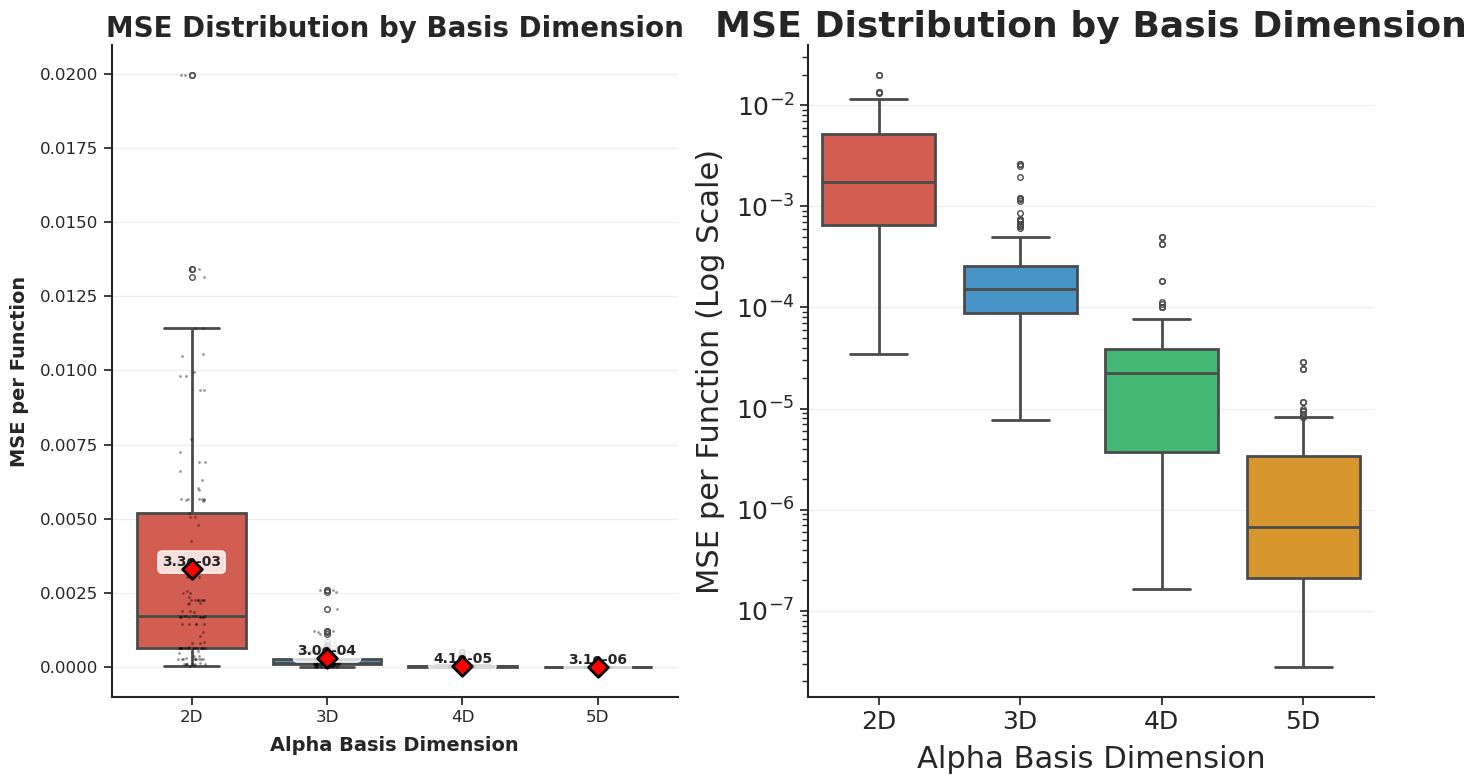

\nCreating worst examples analysis...


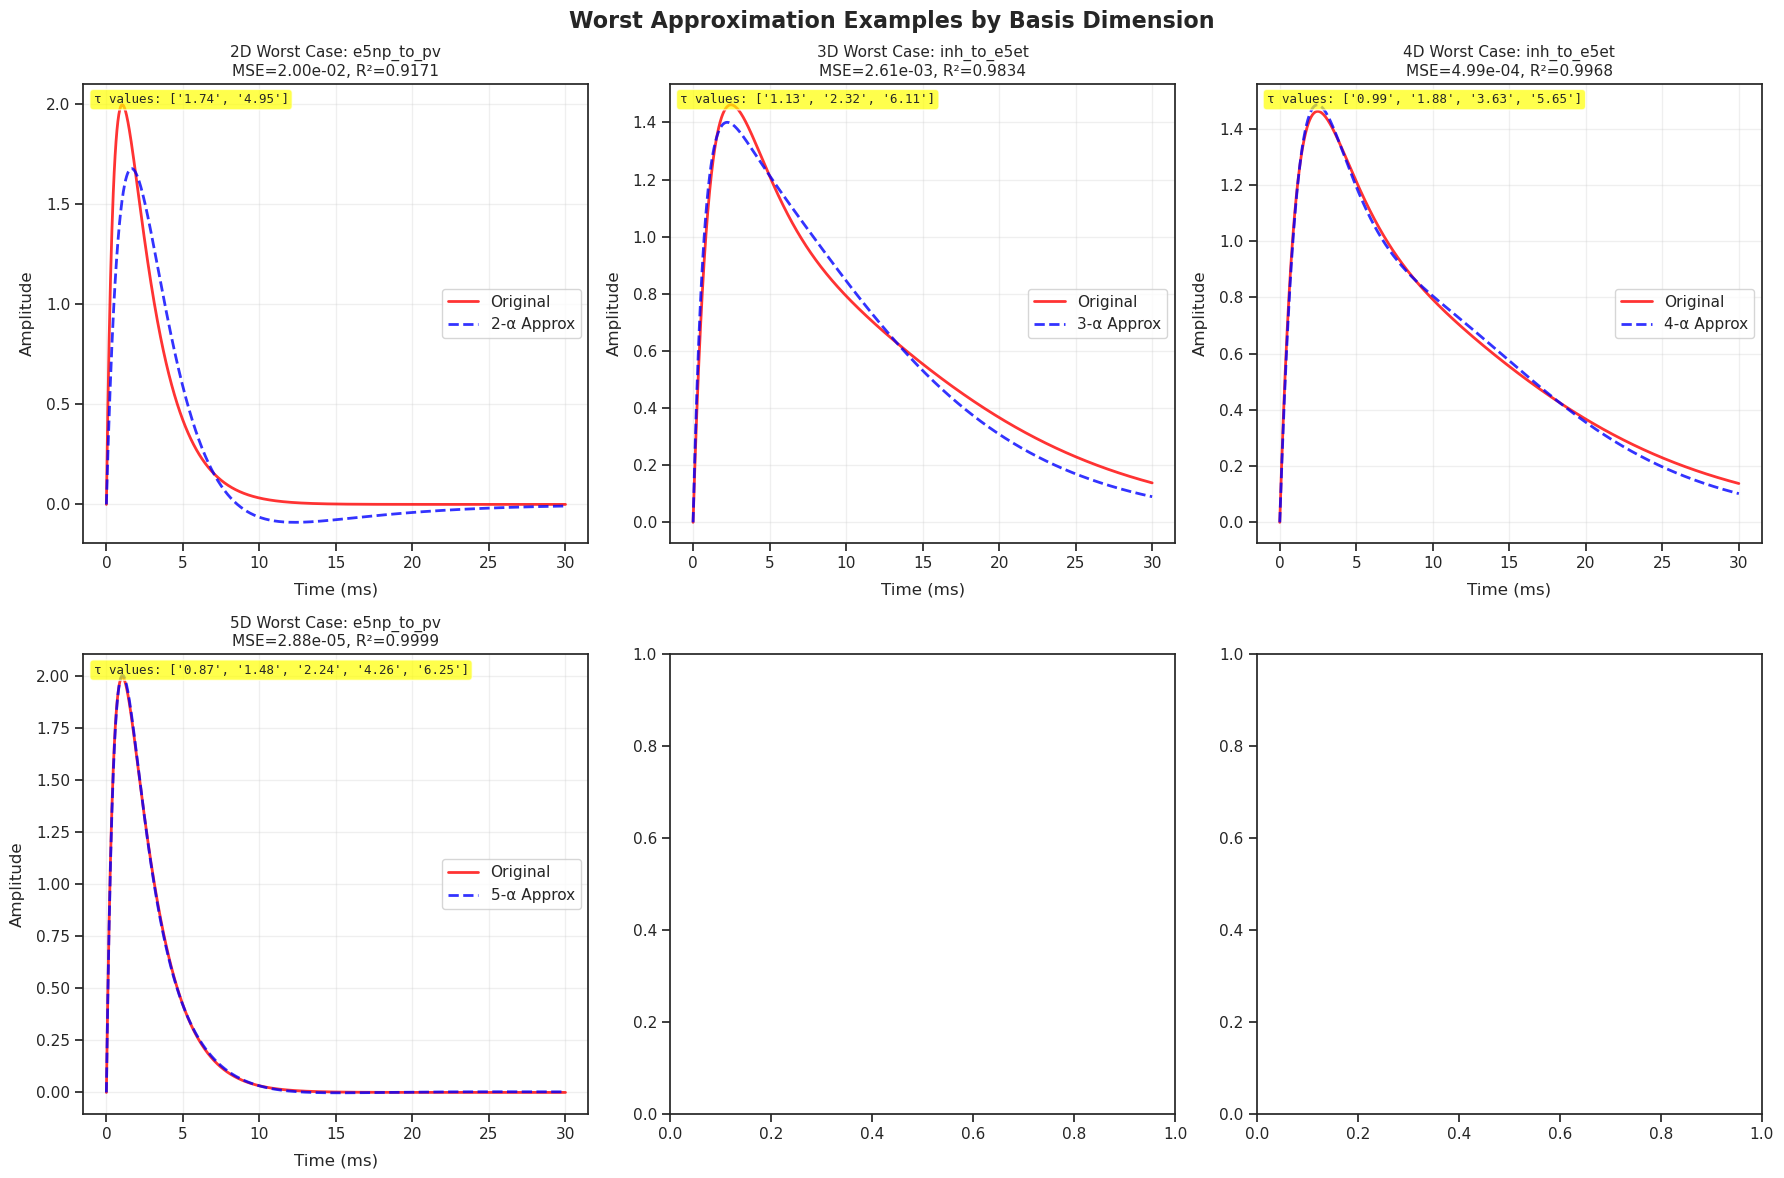

In [39]:
# Create the analysis figures
print("Creating boxplot analysis...")
dimensions_to_test = [2, 3, 4, 5]
boxplot_fig = create_boxplot_mse_analysis(enhanced_results, dimensions_to_test)
plt.show()

print("\\nCreating worst examples analysis...")
worst_examples_fig = create_worst_examples_analysis(enhanced_results, dimensions_to_test, 
                                                   all_functions, t, double_alpha_params)
plt.show()

In [40]:
# Evalute original solutions
path = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/tau_basis.npy'
tau4 = np.load(path)
path5 = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/tau_basis_5.npy'
tau5 = np.load(path5)

# calculate the mean loss for tau4 and tau5
def calculate_mean_loss(tau_values, all_functions, t):
    """
    Calculate the mean loss (MSE) for a given set of tau values.
    
    Parameters:
    -----------
    tau_values : array
        Tau values for the alpha functions.
    all_functions : array
        All double alpha functions to approximate (shape: n_functions x n_timepoints).
    t : array
        Time vector.
    
    Returns:
    --------
    mean_loss : float
        Mean squared error across all functions.
    """
    n_dims = len(tau_values)
    
    # Create design matrix for the given tau values
    design_matrix = np.zeros((len(t), n_dims))
    for j, tau in enumerate(tau_values):
        design_matrix[:, j] = alpha_function(t, tau)
    
    total_mse = 0
    n_functions = all_functions.shape[0]
    
    for i in range(n_functions):
        weights, _, _, _ = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
        approx = n_alpha_approximation(t, weights, tau_values)
        mse = np.mean((all_functions[i] - approx)**2)
        total_mse += mse
    
    mean_loss = total_mse / n_functions
    return mean_loss

# Calculate mean loss for tau4 and tau5
mean_loss_tau4 = calculate_mean_loss(tau4, all_functions, t)
mean_loss_tau5 = calculate_mean_loss(tau5, all_functions, t)
print(f"Mean loss for tau4: {mean_loss_tau4:.6f}")
print(f"Mean loss for tau5: {mean_loss_tau5:.6f}")

# calculate the mse for the worst case in tau4 and tau5
def calculate_worst_case_mse(tau_values, all_functions, t):
    """
    Calculate the worst case MSE for a given set of tau values.
    
    Parameters:
    -----------
    tau_values : array
        Tau values for the alpha functions.
    all_functions : array
        All double alpha functions to approximate (shape: n_functions x n_timepoints).
    t : array
        Time vector.
    
    Returns:
    --------
    worst_mse : float
        Maximum squared error across all functions.
    """
    n_dims = len(tau_values)
    
    # Create design matrix for the given tau values
    design_matrix = np.zeros((len(t), n_dims))
    for j, tau in enumerate(tau_values):
        design_matrix[:, j] = alpha_function(t, tau)
    
    worst_mse = 0
    
    for i in range(all_functions.shape[0]):
        weights, _, _, _ = np.linalg.lstsq(design_matrix, all_functions[i], rcond=None)
        approx = n_alpha_approximation(t, weights, tau_values)
        mse = np.mean((all_functions[i] - approx)**2)
        
        if mse > worst_mse:
            worst_mse = mse
    
    return worst_mse
worst_mse_tau4 = calculate_worst_case_mse(tau4, all_functions, t)
worst_mse_tau5 = calculate_worst_case_mse(tau5, all_functions, t)
print(f"Worst case MSE for tau4: {worst_mse_tau4:.6f}")
print(f"Worst case MSE for tau5: {worst_mse_tau5:.6f}")

Mean loss for tau4: 0.000115
Mean loss for tau5: 0.000008
Worst case MSE for tau4: 0.000544
Worst case MSE for tau5: 0.000042


In [42]:
enhanced_results[4]


{'tau_basis': array([0.98958772, 1.88019093, 3.62895928, 5.65340431]),
 'weights': array([[-1.10278154e-02,  1.24552553e+00,  4.77601298e-01,
         -5.88463412e-02],
        [ 1.40047512e-01,  8.66535719e-01,  3.90896308e-01,
          2.04557505e-01],
        [-6.66894514e-02,  1.40494152e+00,  2.32822275e-01,
         -4.96939294e-02],
        [-1.14562617e-01,  1.69231633e+00,  6.11974543e-01,
         -1.14848133e-01],
        [ 5.33685014e-02,  1.07566580e+00, -2.92670757e-01,
          8.48429849e-01],
        [ 3.84021408e-02,  1.14632105e+00,  1.93781029e-01,
         -1.89026853e-02],
        [ 3.84021408e-02,  1.14632105e+00,  1.93781029e-01,
         -1.89026853e-02],
        [ 1.10700163e+00, -1.29236574e-02,  1.62428268e-01,
         -4.69759424e-02],
        [ 5.31074999e-01,  7.21898063e-01,  8.08815360e-02,
          1.91683778e-02],
        [ 9.82524156e-02,  1.11126749e+00,  4.58503240e-02,
          5.33305346e-03],
        [ 8.82808052e-01,  3.00710766e-01,  9.02

In [41]:
# Save a summary CSV for easy access
summary_data = []
for n_dims in dimensions_to_test:
    result = enhanced_results[n_dims]
    
    # Compute R² statistics
    r2_scores = []
    for i in range(len(all_functions)):
        original = all_functions[i]
        approx = n_alpha_approximation(t, result['weights'][i], result['tau_basis'])
        r2 = r2_score(original, approx)
        r2_scores.append(r2)
    
    excellent = np.sum(np.array(r2_scores) > 0.99)
    good = np.sum((np.array(r2_scores) > 0.95) & (np.array(r2_scores) <= 0.99))
    
    summary_data.append({
        'dimension': n_dims,
        'avg_mse': result['avg_mse'],
        'mean_r2': np.mean(r2_scores),
        'excellent_count': excellent,
        'good_count': good,
        'excellent_percent': 100 * excellent / 121,
        'tau_values': ', '.join([f'{tau:.3f}' for tau in result['tau_basis']])
    })

summary_df = pd.DataFrame(summary_data)
# summary_csv_path = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/multi_dim_summary.csv'
# summary_df.to_csv(summary_csv_path, index=False)

# print(f"Summary CSV saved to: {summary_csv_path}")
print("\\nSummary of all dimensions:")
print(summary_df.to_string(index=False))

\nSummary of all dimensions:
 dimension  avg_mse  mean_r2  excellent_count  good_count  excellent_percent                        tau_values
         2 0.003304 0.975973               57          45          47.107438                      1.737, 4.949
         3 0.000304 0.998151              117           4          96.694215               1.130, 2.322, 6.112
         4 0.000041 0.999757              121           0         100.000000        0.990, 1.880, 3.629, 5.653
         5 0.000003 0.999979              121           0         100.000000 0.875, 1.476, 2.239, 4.259, 6.253


In [44]:
# Save enhanced 4D tau_basis and basis_function_weights
save_path_tau = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/tau_basis_enhanced_4.npy'
save_path_weights = '/home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/basis_function_weights_enhanced_4.csv'

# Save tau_basis
np.save(save_path_tau, enhanced_results[4]['tau_basis'])

# Save weights with connection names
weights_df = pd.DataFrame(enhanced_results[4]['weights'], columns=['w0', 'w1', 'w2', 'w3'])
weights_df.insert(0, 'connection_name', double_alpha_params['Unnamed: 0'].values)
weights_df.to_csv(save_path_weights, index=False)

print(f"Saved tau_basis to: {save_path_tau}")
print(f"Saved basis_function_weights to: {save_path_weights}")
print("First few rows of weights:")
print(weights_df.head())


Saved tau_basis to: /home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/tau_basis_enhanced_4.npy
Saved basis_function_weights to: /home/jgalvan/Desktop/Neurocoding/V1_GLIF_model/synaptic_data/basis_function_weights_enhanced_4.csv
First few rows of weights:
  connection_name        w0        w1        w2        w3
0      exc_to_exc -0.011028  1.245526  0.477601 -0.058846
1      exc_to_e23  0.140048  0.866536  0.390896  0.204558
2       exc_to_e4 -0.066689  1.404942  0.232822 -0.049694
3     exc_to_e5et -0.114563  1.692316  0.611975 -0.114848
4     exc_to_e5it  0.053369  1.075666 -0.292671  0.848430
